#### Imports

In [212]:
import os
import sys
import pandas as pd
from datetime import timedelta
from auto_ts import auto_timeseries
import numpy as np
import dill
import talib
import h2o
from h2o.automl import H2OAutoML
from sklearn.preprocessing import MinMaxScaler

# Verifica la ruta absoluta
ruta = os.path.abspath('/Users/mmarchetta/Desktop/Tesis-2024/data-obtention')
sys.path.append(ruta)

#TODO: eliminar la ejecucion del codigo automaticamente de este file
from dataset_builder import generar_dataset

#### Lectura del dataset

In [213]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

In [214]:
columns = [
    # 'Open_time',
    'Open',
    'High',
    'Low',
    'SMA_20',
    'EMA_20',
    'Upper_Band',
    'Middle_Band',
    'Lower_Band',
    'RSI',
    'MACD',
    'Signal',
    'ADX',
    'SlowK',
    'SlowD',
    'CCI',
    'ATR',
    # 'MFI'
]

In [215]:
complete_dataset = pd.read_csv('final_dataset.csv') 

In [216]:
display(complete_dataset.tail())

,Open_time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Open_BTCUSDT,High_BTCUSDT,Low_BTCUSDT,Close_BTCUSDT,Volume_BTCUSDT,Quote_asset_volume_BTCUSDT,Number_of_trades_BTCUSDT,Open_ETHUSDT,High_ETHUSDT,Low_ETHUSDT,Close_ETHUSDT,Volume_ETHUSDT,Quote_asset_volume_ETHUSDT,Number_of_trades_ETHUSDT,Open_BNBUSDT,High_BNBUSDT,Low_BNBUSDT,Close_BNBUSDT,Volume_BNBUSDT,Quote_asset_volume_BNBUSDT,Number_of_trades_BNBUSDT,SMA_20,EMA_20,Upper_Band,Middle_Band,Lower_Band,RSI,MACD,Signal,ADX,SlowK,SlowD,CCI,ATR,MFI,buy_1000x_high_coinbase,sell_1000x_high_coinbase,total_trades_coinbase,Sentimiento,Tweets_Utilizados,Cantidad_pos,Cantidad_neg,Cantidad_neu,Compound total,Sentimiento_coin,Tweets_Utilizados_coin,Cantidad_pos_coin,Cantidad_neg_coin,Cantidad_neu_coin,Compound total coin,Sentimiento_referentes,Tweets_Utilizados_referentes,Cantidad_pos_referentes,Cantidad_neg_referentes,Cantidad_neu_referentes,Compound total referentes,Tweets_Utilizados_whale_alert,Buy_1000x_high,sell_1000x_high,total_trades_binance,Tendencia
996,2024-06-19,5.771,5.993,5.730,5.799,4114058.810,24212639.522,71171.000,65175.320,65727.540,64666.000,64974.370,20060.796,1307731953.955,1078458.000,3483.420,3590.010,3465.650,3560.510,321500.003,1138419054.653,712501.000,588.600,605.900,586.600,599.300,260529.062,155686523.002,302529.000,6.579,6.460,7.462,6.579,5.696,33.644,-0.284,-0.184,25.268,13.897,16.591,-142.730,0.370,31.081,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Lateral
997,2024-06-20,5.798,5.972,5.600,5.642,3352117.740,19440549.488,85229.000,64974.370,66482.940,64559.150,64869.990,24265.290,1584896152.166,1282687.000,3560.510,3625.960,3486.000,3513.080,329117.845,1170597741.258,743896.000,599.300,608.000,584.600,587.700,289498.772,172878669.790,300306.000,6.512,6.382,7.463,6.512,5.561,31.590,-0.316,-0.212,25.180,15.125,15.639,-145.197,0.370,30.946,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Bajista
998,2024-06-21,5.643,5.737,5.549,5.611,3503011.610,19780172.906,75499.000,64869.990,65066.660,63379.350,64143.560,25993.564,1665541539.709,1362617.000,3513.080,3547.550,3446.820,3518.500,342155.102,1197095546.234,746361.000,587.700,589.300,577.800,586.100,191182.614,111683509.520,231903.000,6.440,6.309,7.433,6.440,5.447,31.902,-0.338,-0.237,26.323,12.907,13.976,-142.161,0.356,33.912,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Lateral
999,2024-06-22,5.612,5.805,5.541,5.751,2939866.910,16717617.250,59425.000,64143.560,64546.810,63943.820,64262.010,7308.955,470027247.340,562832.000,3518.500,3521.190,3475.090,3495.750,115774.616,405045499.422,315684.000,586.200,591.400,581.000,591.100,100439.584,58889744.988,146230.000,6.378,6.258,7.380,6.378,5.375,36.333,-0.343,-0.262,26.894,13.329,13.787,-101.923,0.351,39.006,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Alcista
1000,2024-06-23,5.752,5.830,5.587,5.652,1702329.170,9742415.155,43147.000,64262.010,64521.000,63178.320,63210.010,8224.454,526848525.003,592759.000,3495.760,3521.450,3406.380,3420.910,133411.430,463204539.056,338679.000,591.100,593.200,576.000,577.500,141025.834,82700074.158,187493.000,6.310,6.203,7.316,6.310,5.304,35.148,-0.354,-0.288,27.229,14.367,13.534,-86.225,0.345,35.096,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Bajista


#### Obtengo la informacion del ultimo dia que paso

In [217]:
ultima_fecha = pd.to_datetime(complete_dataset['Open_time'].iloc[-1])
nueva_fecha = ultima_fecha + pd.Timedelta(days=1)

display(ultima_fecha)
display(nueva_fecha)

Timestamp('2024-06-23 00:00:00')

Timestamp('2024-06-24 00:00:00')

In [218]:
complete_dataset.tail()

,Open_time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Open_BTCUSDT,High_BTCUSDT,Low_BTCUSDT,Close_BTCUSDT,Volume_BTCUSDT,Quote_asset_volume_BTCUSDT,Number_of_trades_BTCUSDT,Open_ETHUSDT,High_ETHUSDT,Low_ETHUSDT,Close_ETHUSDT,Volume_ETHUSDT,Quote_asset_volume_ETHUSDT,Number_of_trades_ETHUSDT,Open_BNBUSDT,High_BNBUSDT,Low_BNBUSDT,Close_BNBUSDT,Volume_BNBUSDT,Quote_asset_volume_BNBUSDT,Number_of_trades_BNBUSDT,SMA_20,EMA_20,Upper_Band,Middle_Band,Lower_Band,RSI,MACD,Signal,ADX,SlowK,SlowD,CCI,ATR,MFI,buy_1000x_high_coinbase,sell_1000x_high_coinbase,total_trades_coinbase,Sentimiento,Tweets_Utilizados,Cantidad_pos,Cantidad_neg,Cantidad_neu,Compound total,Sentimiento_coin,Tweets_Utilizados_coin,Cantidad_pos_coin,Cantidad_neg_coin,Cantidad_neu_coin,Compound total coin,Sentimiento_referentes,Tweets_Utilizados_referentes,Cantidad_pos_referentes,Cantidad_neg_referentes,Cantidad_neu_referentes,Compound total referentes,Tweets_Utilizados_whale_alert,Buy_1000x_high,sell_1000x_high,total_trades_binance,Tendencia
996,2024-06-19,5.771,5.993,5.730,5.799,4114058.810,24212639.522,71171.000,65175.320,65727.540,64666.000,64974.370,20060.796,1307731953.955,1078458.000,3483.420,3590.010,3465.650,3560.510,321500.003,1138419054.653,712501.000,588.600,605.900,586.600,599.300,260529.062,155686523.002,302529.000,6.579,6.460,7.462,6.579,5.696,33.644,-0.284,-0.184,25.268,13.897,16.591,-142.730,0.370,31.081,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Lateral
997,2024-06-20,5.798,5.972,5.600,5.642,3352117.740,19440549.488,85229.000,64974.370,66482.940,64559.150,64869.990,24265.290,1584896152.166,1282687.000,3560.510,3625.960,3486.000,3513.080,329117.845,1170597741.258,743896.000,599.300,608.000,584.600,587.700,289498.772,172878669.790,300306.000,6.512,6.382,7.463,6.512,5.561,31.590,-0.316,-0.212,25.180,15.125,15.639,-145.197,0.370,30.946,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Bajista
998,2024-06-21,5.643,5.737,5.549,5.611,3503011.610,19780172.906,75499.000,64869.990,65066.660,63379.350,64143.560,25993.564,1665541539.709,1362617.000,3513.080,3547.550,3446.820,3518.500,342155.102,1197095546.234,746361.000,587.700,589.300,577.800,586.100,191182.614,111683509.520,231903.000,6.440,6.309,7.433,6.440,5.447,31.902,-0.338,-0.237,26.323,12.907,13.976,-142.161,0.356,33.912,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Lateral
999,2024-06-22,5.612,5.805,5.541,5.751,2939866.910,16717617.250,59425.000,64143.560,64546.810,63943.820,64262.010,7308.955,470027247.340,562832.000,3518.500,3521.190,3475.090,3495.750,115774.616,405045499.422,315684.000,586.200,591.400,581.000,591.100,100439.584,58889744.988,146230.000,6.378,6.258,7.380,6.378,5.375,36.333,-0.343,-0.262,26.894,13.329,13.787,-101.923,0.351,39.006,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Alcista
1000,2024-06-23,5.752,5.830,5.587,5.652,1702329.170,9742415.155,43147.000,64262.010,64521.000,63178.320,63210.010,8224.454,526848525.003,592759.000,3495.760,3521.450,3406.380,3420.910,133411.430,463204539.056,338679.000,591.100,593.200,576.000,577.500,141025.834,82700074.158,187493.000,6.310,6.203,7.316,6.310,5.304,35.148,-0.354,-0.288,27.229,14.367,13.534,-86.225,0.345,35.096,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Bajista


#### Obtengo la informacion de ese dia

In [219]:
margin_days = 40
wanted_previous_dates = 1
binance_symbol = 'DOTUSDT'
coinbase_symbol = 'DOT-USD'
interval = '1d'
n_days_to_predict = 10

start_time = int((nueva_fecha - timedelta(days=(margin_days + wanted_previous_dates + 1))).timestamp() * 1000)
end_time = int((nueva_fecha + timedelta(days=(1))).timestamp() * 1000)

start_date = nueva_fecha - timedelta(days=(wanted_previous_dates))
end_date = nueva_fecha + timedelta(days=1)

In [220]:
dataset_nuevo_registro = generar_dataset(interval, start_time, end_time, start_date, end_date, coinbase_symbol, binance_symbol, ['BTCUSDT', 'ETHUSDT', 'BNBUSDT'])

In [221]:
dataset_nuevo_registro['buy_1000x_high_coinbase'] = 0
dataset_nuevo_registro['Cantidad_pos'] = 0
dataset_nuevo_registro['Cantidad_neg'] = 0
dataset_nuevo_registro['Cantidad_neu'] = 0
dataset_nuevo_registro['Compound_total'] = 0
dataset_nuevo_registro['Sentimiento_coin'] = 0
dataset_nuevo_registro['Tweets_Utilizados_coin'] = 0
dataset_nuevo_registro['Cantidad_pos_coin'] = 0
dataset_nuevo_registro['Cantidad_neg_coin'] = 0
dataset_nuevo_registro['Cantidad_neu_coin'] = 0
dataset_nuevo_registro['Compound_total_coin'] = 0
dataset_nuevo_registro['Sentimiento_referentes'] = 0
dataset_nuevo_registro['Tweets_Utilizados_referentes'] = 0
dataset_nuevo_registro['Cantidad_pos_referentes'] = 0
dataset_nuevo_registro['Cantidad_neg_referentes'] = 0
dataset_nuevo_registro['Cantidad_neu_referentes'] = 0
dataset_nuevo_registro['Compound_total_referentes'] = 0
dataset_nuevo_registro['Tweets_Utilizados_whale_alert'] = 0
dataset_nuevo_registro['sell_1000x_high_coinbase'] = 0
dataset_nuevo_registro['total_trades_coinbase'] = 0
dataset_nuevo_registro['Sentimiento'] = 0
dataset_nuevo_registro['Tweets_Utilizados'] = 0
dataset_nuevo_registro['Compound total'] = 0
dataset_nuevo_registro['Compound total coin'] = 0
dataset_nuevo_registro['Compound total referentes'] = 0
dataset_nuevo_registro['Buy_1000x_high'] = 0
dataset_nuevo_registro['Buy_1000x_high'] = 0
dataset_nuevo_registro['total_trades_binance'] = 0
dataset_nuevo_registro['sell_1000x_high'] = 0

In [222]:
ultimo_close = complete_dataset['Close'].iloc[-1]
nuevo_registro = dataset_nuevo_registro[:].iloc[-2] #por algun motivo me trae los datos del dia actual hasta el momento tmb
display(ultimo_close)
display(nuevo_registro)

5.652

Open_time                    2024-06-24 00:00:00
Open                                  5.65100000
High                                  5.74000000
Low                                   5.38900000
Close                                 5.72900000
                                    ...         
Compound total coin                            0
Compound total referentes                      0
Buy_1000x_high                                 0
total_trades_binance                           0
sell_1000x_high                                0
Name: 42, Length: 71, dtype: object

In [223]:
def categorizar_tendencia(cambio):
    if cambio > 0.015:
        return 'Alcista'
    elif -0.015 <= cambio <= 0.015:
        return 'Lateral'
    elif cambio <= -0.015:
        return 'Bajista'

# Calcular el cambio en el precio de cierre entre dos periodos
cambio = float(nuevo_registro['Close']) - ultimo_close
percent_change = cambio / ultimo_close

# Categorizar la tendencia
tendencia = categorizar_tendencia(percent_change)

nuevo_registro['Tendencia'] = tendencia

In [224]:
display(pd.DataFrame(nuevo_registro).T)
nuevo_registro = pd.DataFrame(nuevo_registro).T

,Open_time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Open_BTCUSDT,High_BTCUSDT,Low_BTCUSDT,Close_BTCUSDT,Volume_BTCUSDT,Quote_asset_volume_BTCUSDT,Number_of_trades_BTCUSDT,Open_ETHUSDT,High_ETHUSDT,Low_ETHUSDT,Close_ETHUSDT,Volume_ETHUSDT,Quote_asset_volume_ETHUSDT,Number_of_trades_ETHUSDT,Open_BNBUSDT,High_BNBUSDT,Low_BNBUSDT,Close_BNBUSDT,Volume_BNBUSDT,Quote_asset_volume_BNBUSDT,Number_of_trades_BNBUSDT,SMA_20,EMA_20,Upper_Band,Middle_Band,Lower_Band,RSI,MACD,Signal,ADX,SlowK,SlowD,CCI,ATR,MFI,buy_1000x_high_coinbase,Cantidad_pos,Cantidad_neg,Cantidad_neu,Compound_total,Sentimiento_coin,Tweets_Utilizados_coin,Cantidad_pos_coin,Cantidad_neg_coin,Cantidad_neu_coin,Compound_total_coin,Sentimiento_referentes,Tweets_Utilizados_referentes,Cantidad_pos_referentes,Cantidad_neg_referentes,Cantidad_neu_referentes,Compound_total_referentes,Tweets_Utilizados_whale_alert,sell_1000x_high_coinbase,total_trades_coinbase,Sentimiento,Tweets_Utilizados,Compound total,Compound total coin,Compound total referentes,Buy_1000x_high,total_trades_binance,sell_1000x_high,Tendencia
42,2024-06-24,5.65100000,5.74000000,5.38900000,5.72900000,5455119.88000000,30581475.85042000,141446,63210.01000000,63369.80000000,58402.00000000,60293.30000000,52161.35414000,3180853460.92475080,2190787,3420.91000000,3435.76000000,3240.00000000,3352.73000000,543370.42290000,1807046957.96521900,1222789,577.50000000,582.00000000,551.20000000,568.10000000,356915.24800000,201975223.94530000,476485,6.238,6.162,7.191,6.238,5.284,37.527,-0.357,-0.314,28.209,18.295,15.330,-86.552,0.345,28.960,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Lateral


In [225]:
complete_dataset.dtypes

Open_time                         object
Open                             float64
High                             float64
Low                              float64
Close                            float64
                                  ...   
Tweets_Utilizados_whale_alert    float64
Buy_1000x_high                   float64
sell_1000x_high                  float64
total_trades_binance             float64
Tendencia                         object
Length: 69, dtype: object

In [226]:
# Acomodo las unidades y el formato de fecha
columns_to_convert = nuevo_registro.columns.difference(['Open_time', 'Tendencia'])
nuevo_registro[columns_to_convert] = nuevo_registro[columns_to_convert].astype(float).round(3)

nuevo_registro['Open_time'] = pd.to_datetime(nuevo_registro['Open_time']).dt.date

display(nuevo_registro)

,Open_time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Open_BTCUSDT,High_BTCUSDT,Low_BTCUSDT,Close_BTCUSDT,Volume_BTCUSDT,Quote_asset_volume_BTCUSDT,Number_of_trades_BTCUSDT,Open_ETHUSDT,High_ETHUSDT,Low_ETHUSDT,Close_ETHUSDT,Volume_ETHUSDT,Quote_asset_volume_ETHUSDT,Number_of_trades_ETHUSDT,Open_BNBUSDT,High_BNBUSDT,Low_BNBUSDT,Close_BNBUSDT,Volume_BNBUSDT,Quote_asset_volume_BNBUSDT,Number_of_trades_BNBUSDT,SMA_20,EMA_20,Upper_Band,Middle_Band,Lower_Band,RSI,MACD,Signal,ADX,SlowK,SlowD,CCI,ATR,MFI,buy_1000x_high_coinbase,Cantidad_pos,Cantidad_neg,Cantidad_neu,Compound_total,Sentimiento_coin,Tweets_Utilizados_coin,Cantidad_pos_coin,Cantidad_neg_coin,Cantidad_neu_coin,Compound_total_coin,Sentimiento_referentes,Tweets_Utilizados_referentes,Cantidad_pos_referentes,Cantidad_neg_referentes,Cantidad_neu_referentes,Compound_total_referentes,Tweets_Utilizados_whale_alert,sell_1000x_high_coinbase,total_trades_coinbase,Sentimiento,Tweets_Utilizados,Compound total,Compound total coin,Compound total referentes,Buy_1000x_high,total_trades_binance,sell_1000x_high,Tendencia
42,2024-06-24,5.651,5.740,5.389,5.729,5455119.880,30581475.850,141446.000,63210.010,63369.800,58402.000,60293.300,52161.354,3180853460.925,2190787.000,3420.910,3435.760,3240.000,3352.730,543370.423,1807046957.965,1222789.000,577.500,582.000,551.200,568.100,356915.248,201975223.945,476485.000,6.238,6.162,7.191,6.238,5.284,37.527,-0.357,-0.314,28.209,18.295,15.330,-86.552,0.345,28.960,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Lateral


In [227]:
nuevo_registro.dtypes

Open_time                     object
Open                         float64
High                         float64
Low                          float64
Close                        float64
                              ...   
Compound total referentes    float64
Buy_1000x_high               float64
total_trades_binance         float64
sell_1000x_high              float64
Tendencia                     object
Length: 72, dtype: object

In [228]:
nuevo_df = pd.concat([complete_dataset, nuevo_registro[complete_dataset.columns]], ignore_index=True)
nuevo_df['Open_time'] = pd.to_datetime(nuevo_df['Open_time'])
nuevo_df.to_csv('final_dataset.csv', index=False) 
display(nuevo_df.tail(5))

,Open_time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Open_BTCUSDT,High_BTCUSDT,Low_BTCUSDT,Close_BTCUSDT,Volume_BTCUSDT,Quote_asset_volume_BTCUSDT,Number_of_trades_BTCUSDT,Open_ETHUSDT,High_ETHUSDT,Low_ETHUSDT,Close_ETHUSDT,Volume_ETHUSDT,Quote_asset_volume_ETHUSDT,Number_of_trades_ETHUSDT,Open_BNBUSDT,High_BNBUSDT,Low_BNBUSDT,Close_BNBUSDT,Volume_BNBUSDT,Quote_asset_volume_BNBUSDT,Number_of_trades_BNBUSDT,SMA_20,EMA_20,Upper_Band,Middle_Band,Lower_Band,RSI,MACD,Signal,ADX,SlowK,SlowD,CCI,ATR,MFI,buy_1000x_high_coinbase,sell_1000x_high_coinbase,total_trades_coinbase,Sentimiento,Tweets_Utilizados,Cantidad_pos,Cantidad_neg,Cantidad_neu,Compound total,Sentimiento_coin,Tweets_Utilizados_coin,Cantidad_pos_coin,Cantidad_neg_coin,Cantidad_neu_coin,Compound total coin,Sentimiento_referentes,Tweets_Utilizados_referentes,Cantidad_pos_referentes,Cantidad_neg_referentes,Cantidad_neu_referentes,Compound total referentes,Tweets_Utilizados_whale_alert,Buy_1000x_high,sell_1000x_high,total_trades_binance,Tendencia
997,2024-06-20,5.798,5.972,5.600,5.642,3352117.740,19440549.488,85229.000,64974.370,66482.940,64559.150,64869.990,24265.290,1584896152.166,1282687.000,3560.510,3625.960,3486.000,3513.080,329117.845,1170597741.258,743896.000,599.300,608.000,584.600,587.700,289498.772,172878669.790,300306.000,6.512,6.382,7.463,6.512,5.561,31.590,-0.316,-0.212,25.180,15.125,15.639,-145.197,0.370,30.946,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Bajista
998,2024-06-21,5.643,5.737,5.549,5.611,3503011.610,19780172.906,75499.000,64869.990,65066.660,63379.350,64143.560,25993.564,1665541539.709,1362617.000,3513.080,3547.550,3446.820,3518.500,342155.102,1197095546.234,746361.000,587.700,589.300,577.800,586.100,191182.614,111683509.520,231903.000,6.440,6.309,7.433,6.440,5.447,31.902,-0.338,-0.237,26.323,12.907,13.976,-142.161,0.356,33.912,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Lateral
999,2024-06-22,5.612,5.805,5.541,5.751,2939866.910,16717617.250,59425.000,64143.560,64546.810,63943.820,64262.010,7308.955,470027247.340,562832.000,3518.500,3521.190,3475.090,3495.750,115774.616,405045499.422,315684.000,586.200,591.400,581.000,591.100,100439.584,58889744.988,146230.000,6.378,6.258,7.380,6.378,5.375,36.333,-0.343,-0.262,26.894,13.329,13.787,-101.923,0.351,39.006,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Alcista
1000,2024-06-23,5.752,5.830,5.587,5.652,1702329.170,9742415.155,43147.000,64262.010,64521.000,63178.320,63210.010,8224.454,526848525.003,592759.000,3495.760,3521.450,3406.380,3420.910,133411.430,463204539.056,338679.000,591.100,593.200,576.000,577.500,141025.834,82700074.158,187493.000,6.310,6.203,7.316,6.310,5.304,35.148,-0.354,-0.288,27.229,14.367,13.534,-86.225,0.345,35.096,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Bajista
1001,2024-06-24,5.651,5.740,5.389,5.729,5455119.880,30581475.850,141446.000,63210.010,63369.800,58402.000,60293.300,52161.354,3180853460.925,2190787.000,3420.910,3435.760,3240.000,3352.730,543370.423,1807046957.965,1222789.000,577.500,582.000,551.200,568.100,356915.248,201975223.945,476485.000,6.238,6.162,7.191,6.238,5.284,37.527,-0.357,-0.314,28.209,18.295,15.330,-86.552,0.345,28.960,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Lateral


#### Re-entreno los mejores modelos predictores de features

In [188]:
columns_to_predict = [
    # 'Open_time',
    'Open',
    'High',
    'Low',
    'Close',
]

In [189]:
nuevo_df = pd.read_csv('final_dataset.csv')
features = nuevo_df[columns_to_predict]
features['timestamp'] = pd.to_datetime(nuevo_df['Open_time'])
features = features[['timestamp'] + columns_to_predict]
display(features)

,timestamp,Open,High,Low,Close
0,2021-09-27,28.840,30.260,27.500,27.710
1,2021-09-28,27.720,28.380,26.140,26.310
2,2021-09-29,26.310,28.590,26.110,27.280
3,2021-09-30,27.280,28.990,27.130,28.620
4,2021-10-01,28.610,32.330,28.500,31.940
...,...,...,...,...,...
996,2024-06-19,5.771,5.993,5.730,5.799
997,2024-06-20,5.798,5.972,5.600,5.642
998,2024-06-21,5.643,5.737,5.549,5.611
999,2024-06-22,5.612,5.805,5.541,5.751


In [190]:
features.dtypes

timestamp    datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
dtype: object

In [191]:
trained_models = {}

Start of Fit.....
    Target variable given as = Open
Start of loading of data.....
    Inputs: ts_column = timestamp, sep = ,, target = ['Open']
    Using given input: pandas dataframe...
    timestamp column exists in given train data...
    train data shape = (1001, 4)
Alert: Could not detect strf_time_format of timestamp. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Results of Augmented Dickey-Fuller Test:
+-----------------------------+------------------------------+
|                             | Dickey-Fuller Augmented Test |
+-----------------------------+------------------------------+
|        Test Statistic       |     -1.8127231870488176      |
|           p-value           |       0.37416353029035       |
|          #Lags Used         |             0.0              |
| Number of Observations Used |            1000.0            |
|     Critical Value (1%)     |   

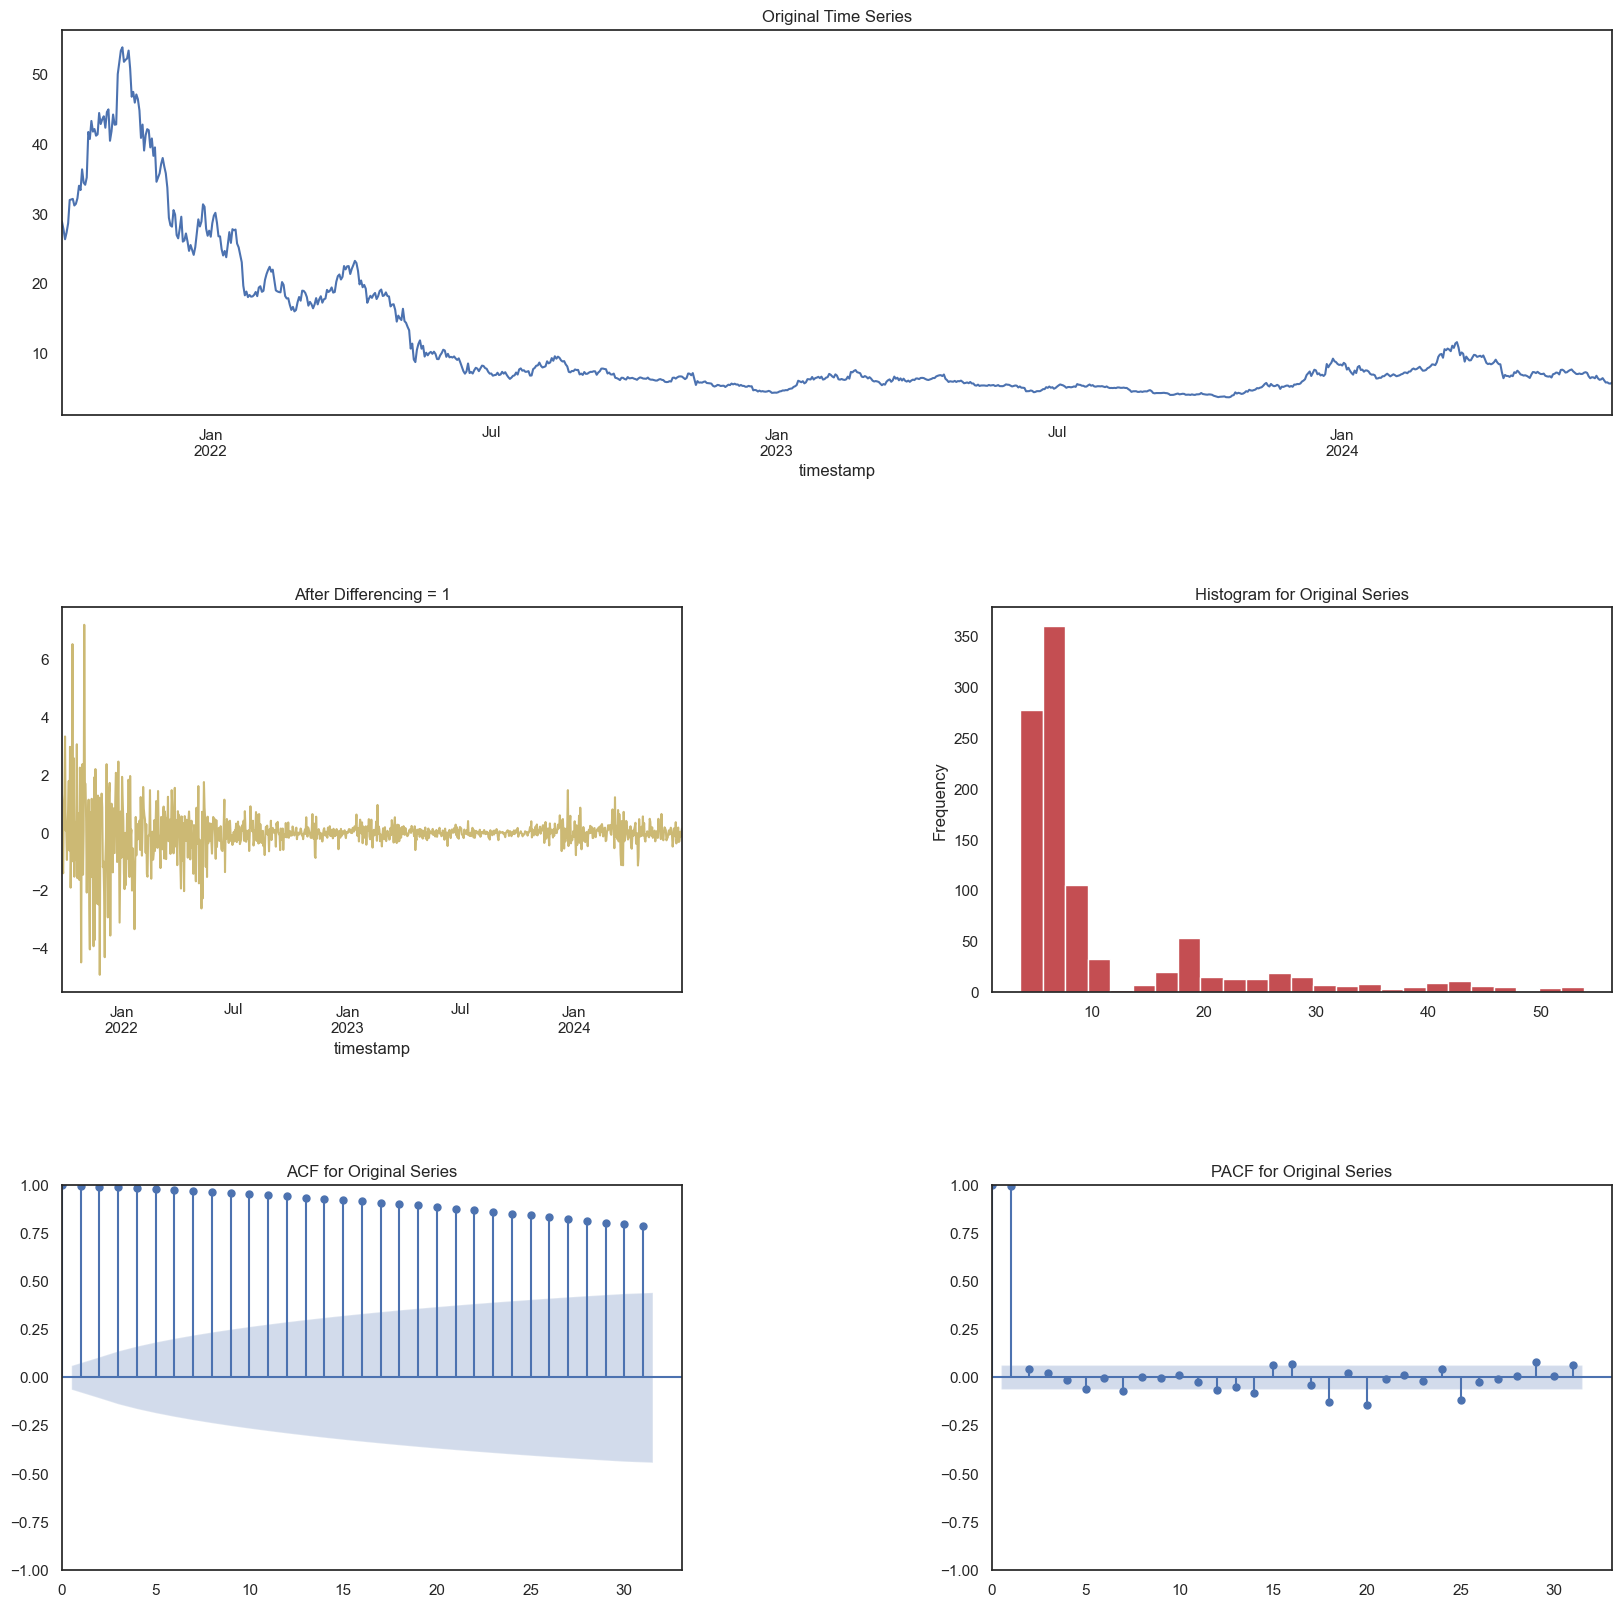

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...
Start of Fit.....
    Target variable given as = Open
Start of loading of data.....
    Inputs: ts_column = timestamp, sep = ,, target = ['Open']
    Using given input: pandas dataframe...
    timestamp column exists in given train data...
    train data shape = (1001, 4)
Alert: Could not detect strf_time_format of timestamp. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model


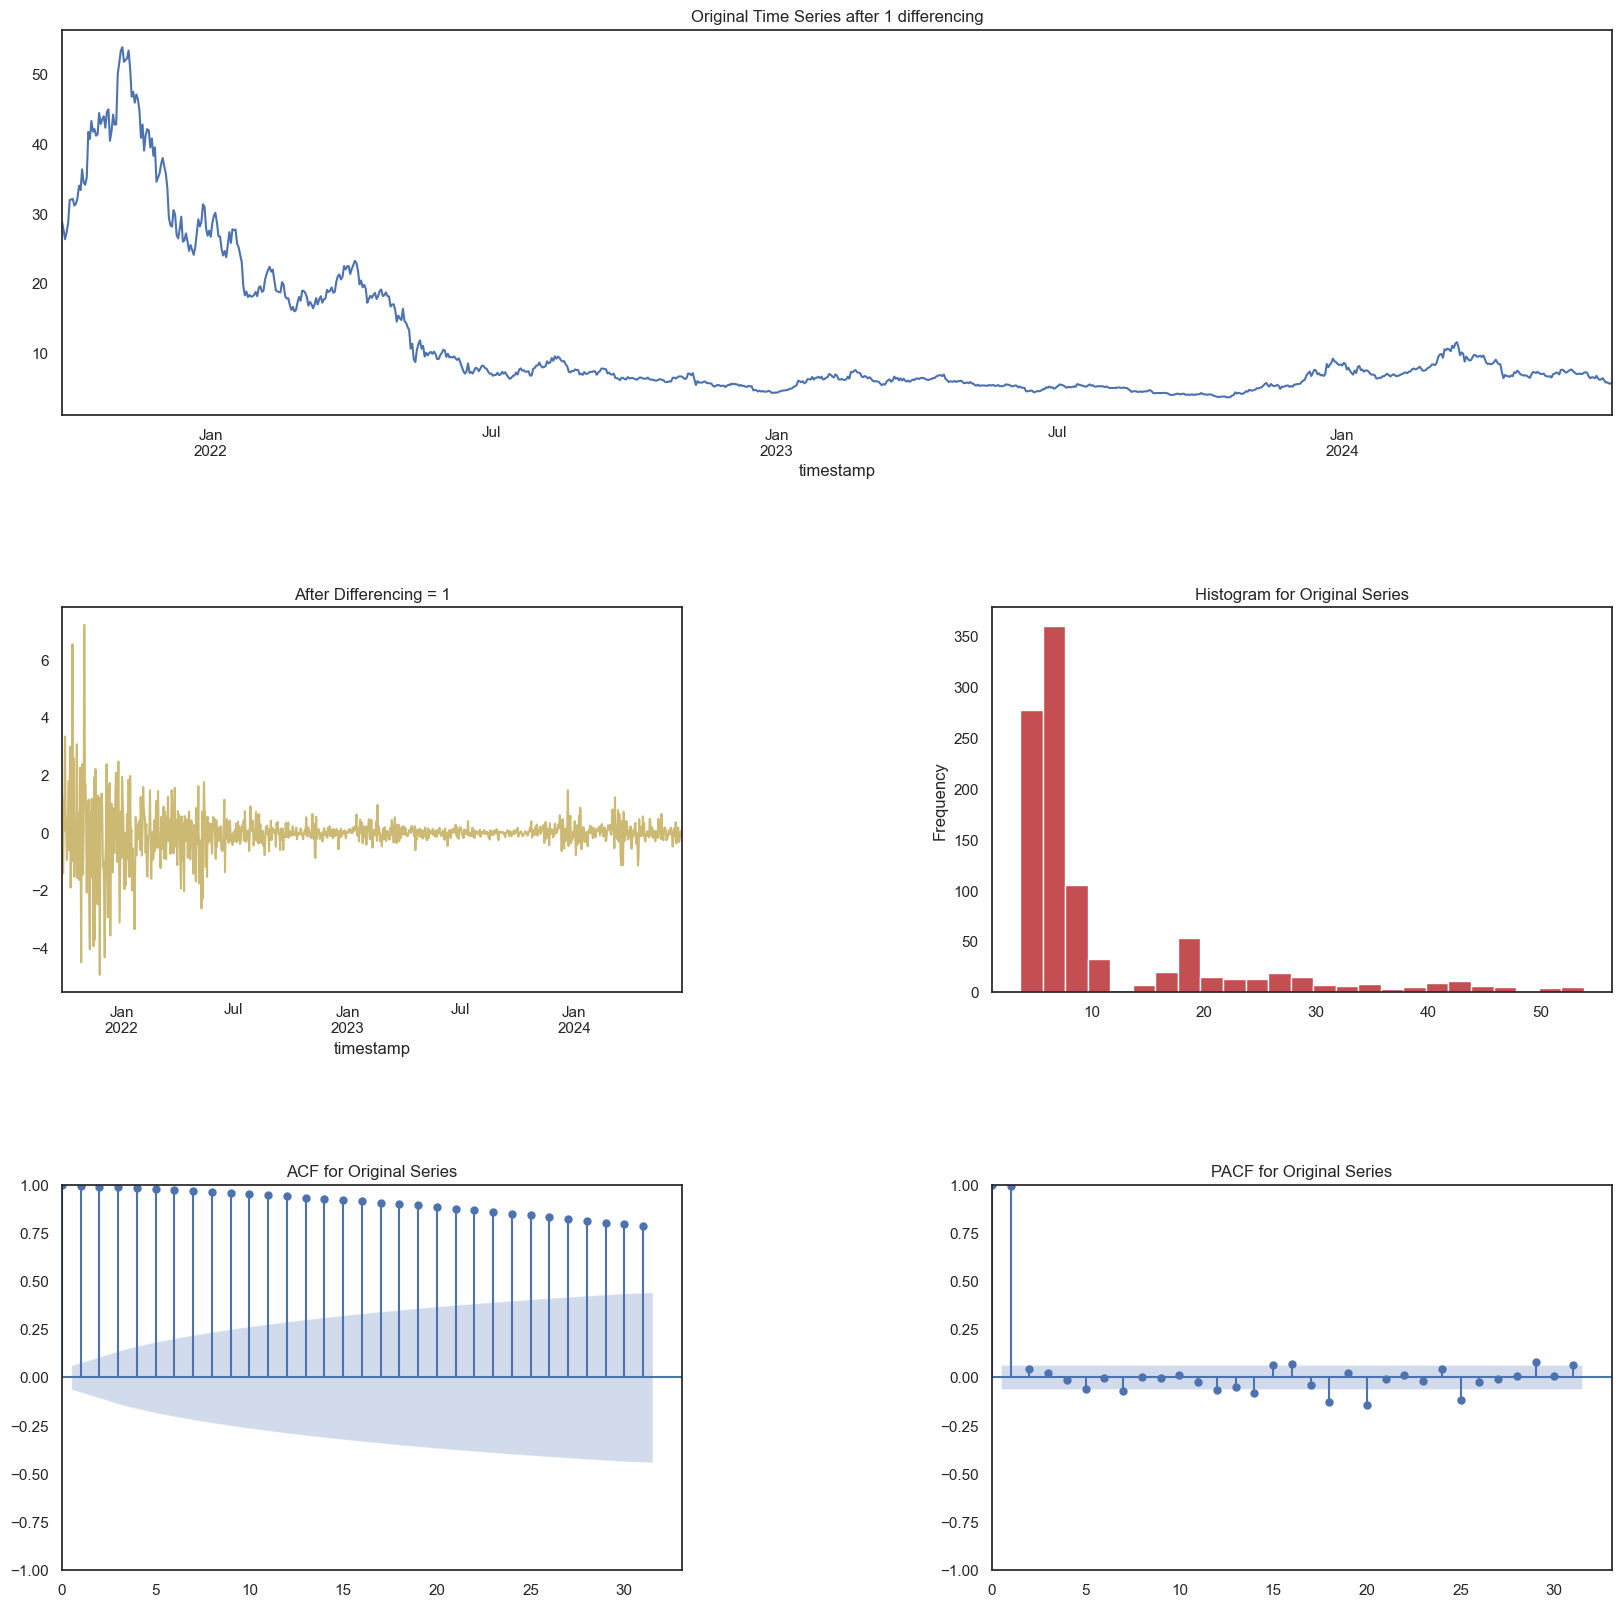

21:20:51 - cmdstanpy - INFO - Chain [1] start processing


Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100}
    Fit-Predict data (shape=(1001, 5)) with Confidence Interval = 0.95...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 2

Fold Number: 1 --> Train Shape: 981 Test Shape: 10


Python(68505) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
21:20:51 - cmdstanpy - INFO - Chain [1] done processing
21:20:51 - cmdstanpy - INFO - Chain [1] start processing


    RMSE = 0.36
    Std Deviation of actuals = 0.32
    Normalized RMSE (as pct of std dev) = 113%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 991 Test Shape: 10


Python(68507) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
21:20:51 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 1.05
    Std Deviation of actuals = 0.28
    Normalized RMSE (as pct of std dev) = 371%
Cross Validation window: 2 completed

-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 0.64
    MSE (Mean Squared Error = 0.61
    MAPE (Mean Absolute Percent Error) = 11%
    RMSE (Root Mean Squared Error) = 0.7835
    Normalized RMSE (MinMax) = 48%
    Normalized RMSE (as Std Dev of Actuals)= 152%
Time Taken = 1 seconds


21:20:52 - cmdstanpy - INFO - Chain [1] start processing
Python(68508) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
21:20:52 - cmdstanpy - INFO - Chain [1] done processing


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: False
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 981 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2309.868, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2310.525, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2310.548, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2308.659, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2304.488, Time=0.41 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2306.250, Time=0.35 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2314.469, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2312.469, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2312.461, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2307.467, Time=0.81 sec
 

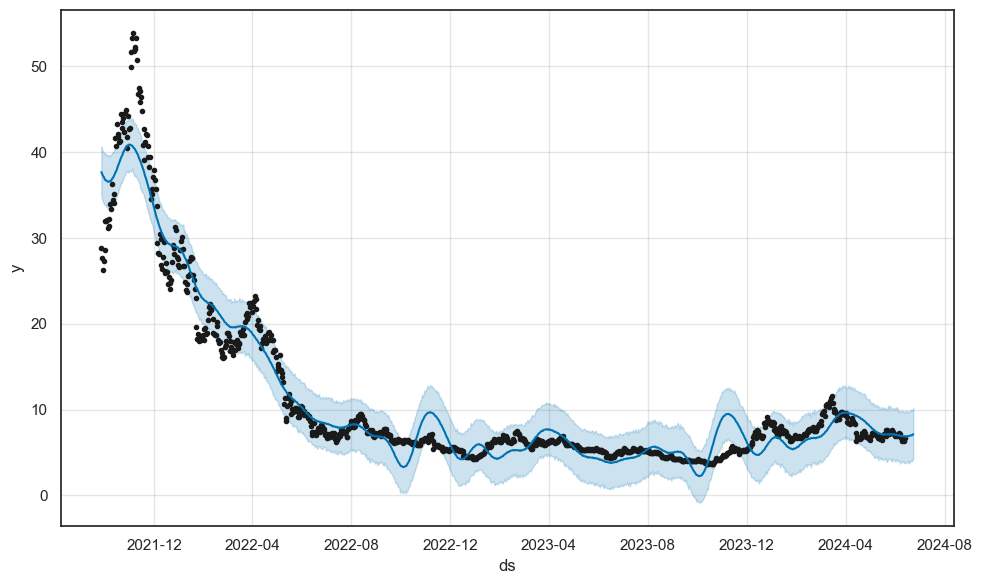

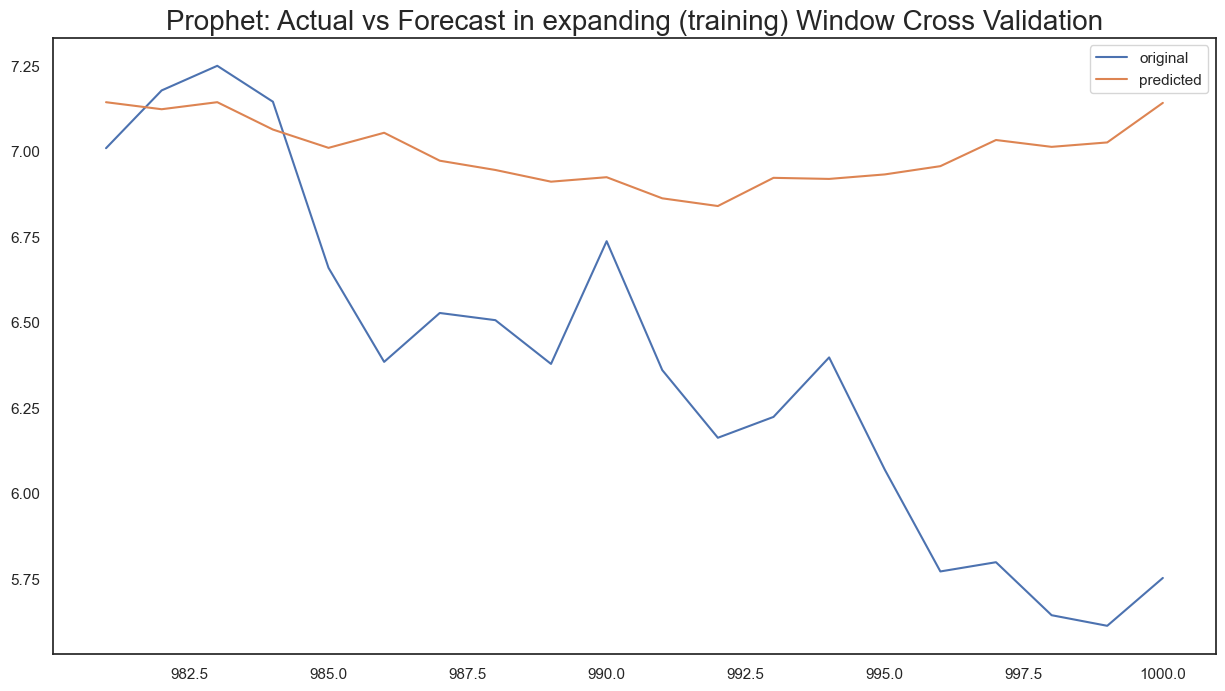

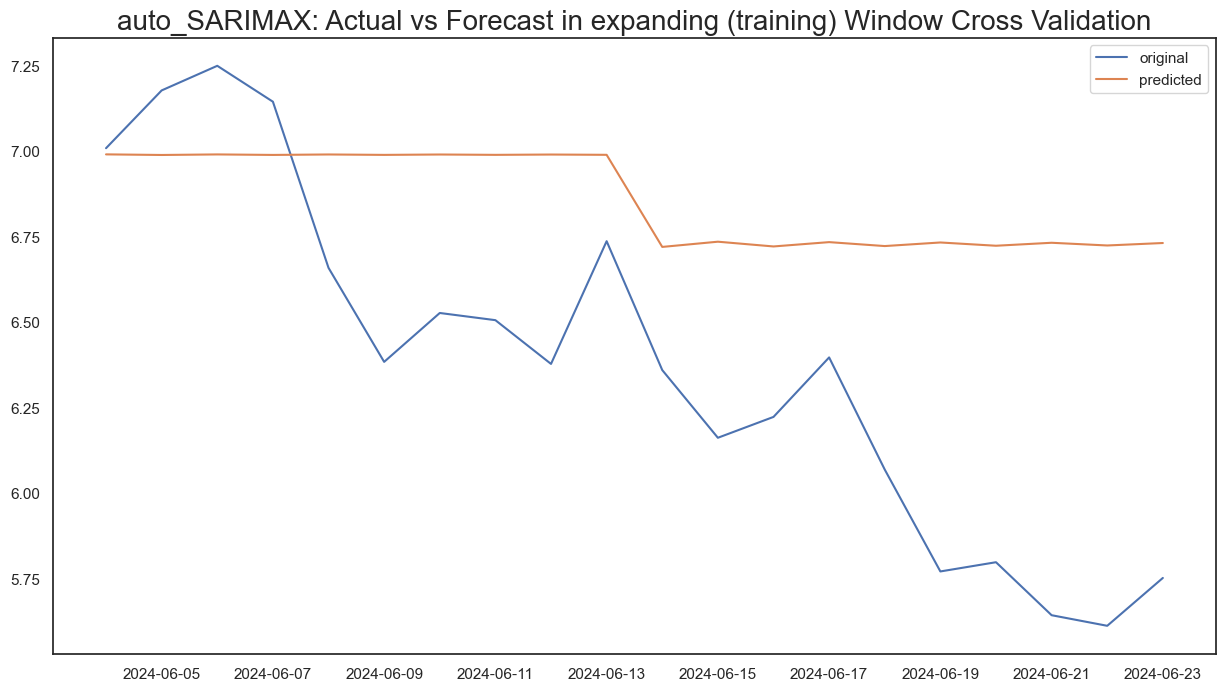

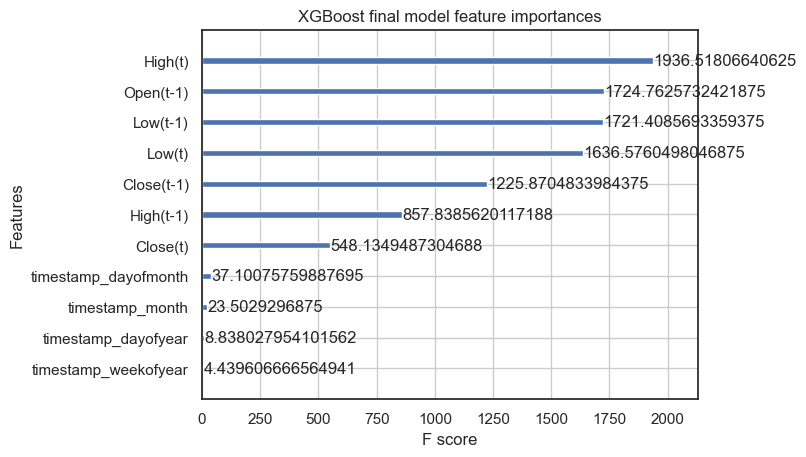

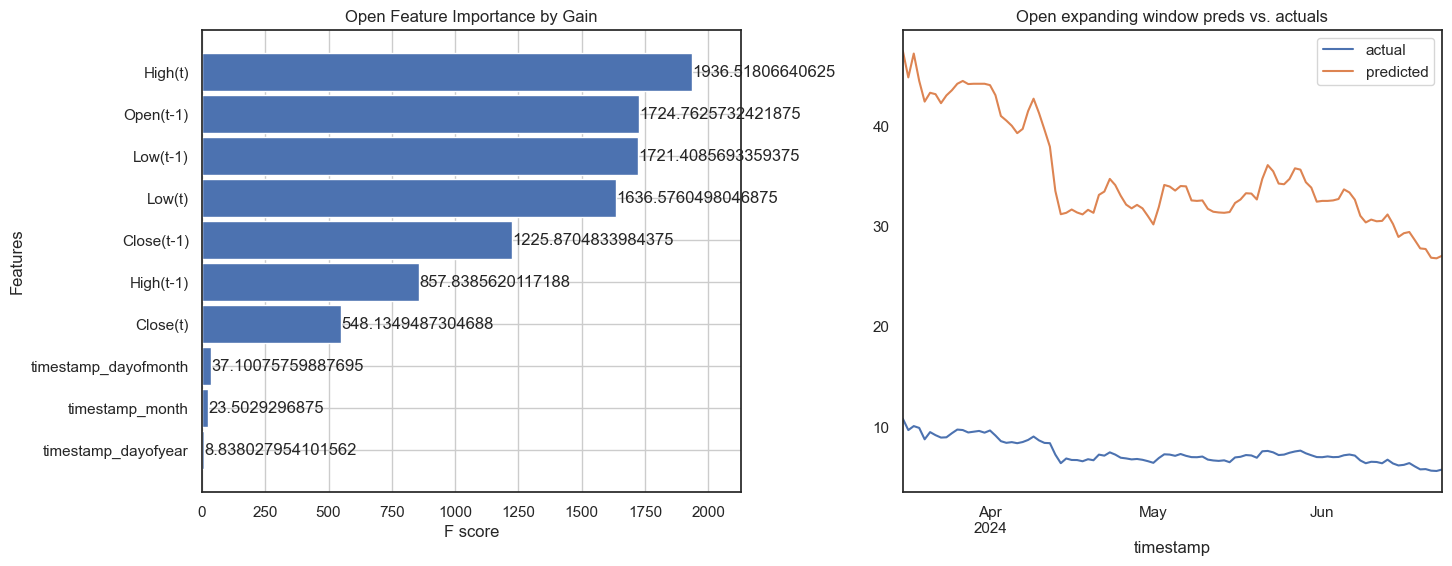

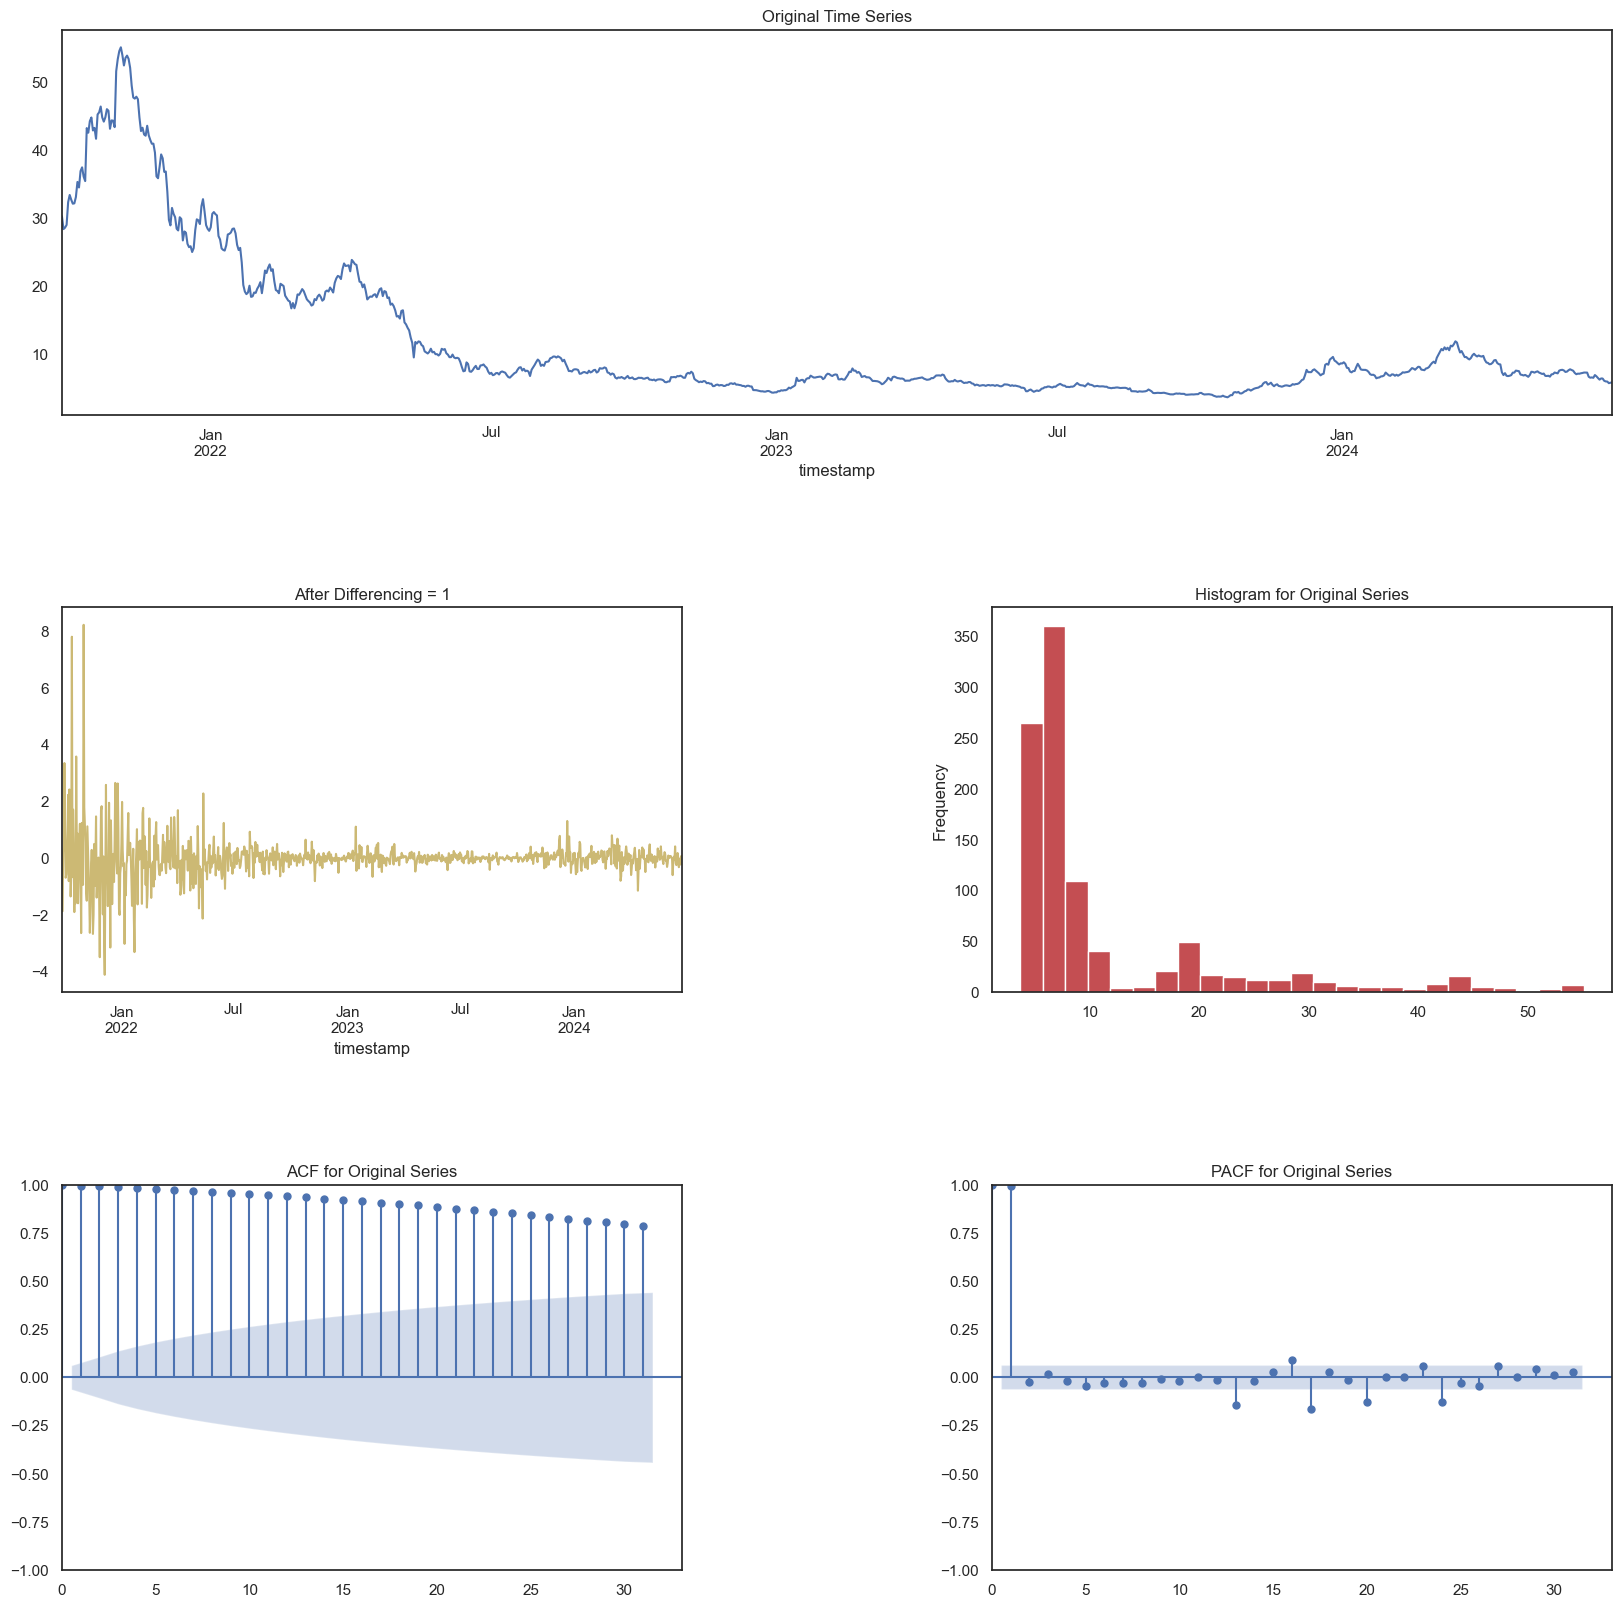

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...
Start of Fit.....
    Target variable given as = High
Start of loading of data.....
    Inputs: ts_column = timestamp, sep = ,, target = ['High']
    Using given input: pandas dataframe...
    timestamp column exists in given train data...
    train data shape = (1001, 4)
Alert: Could not detect strf_time_format of timestamp. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model


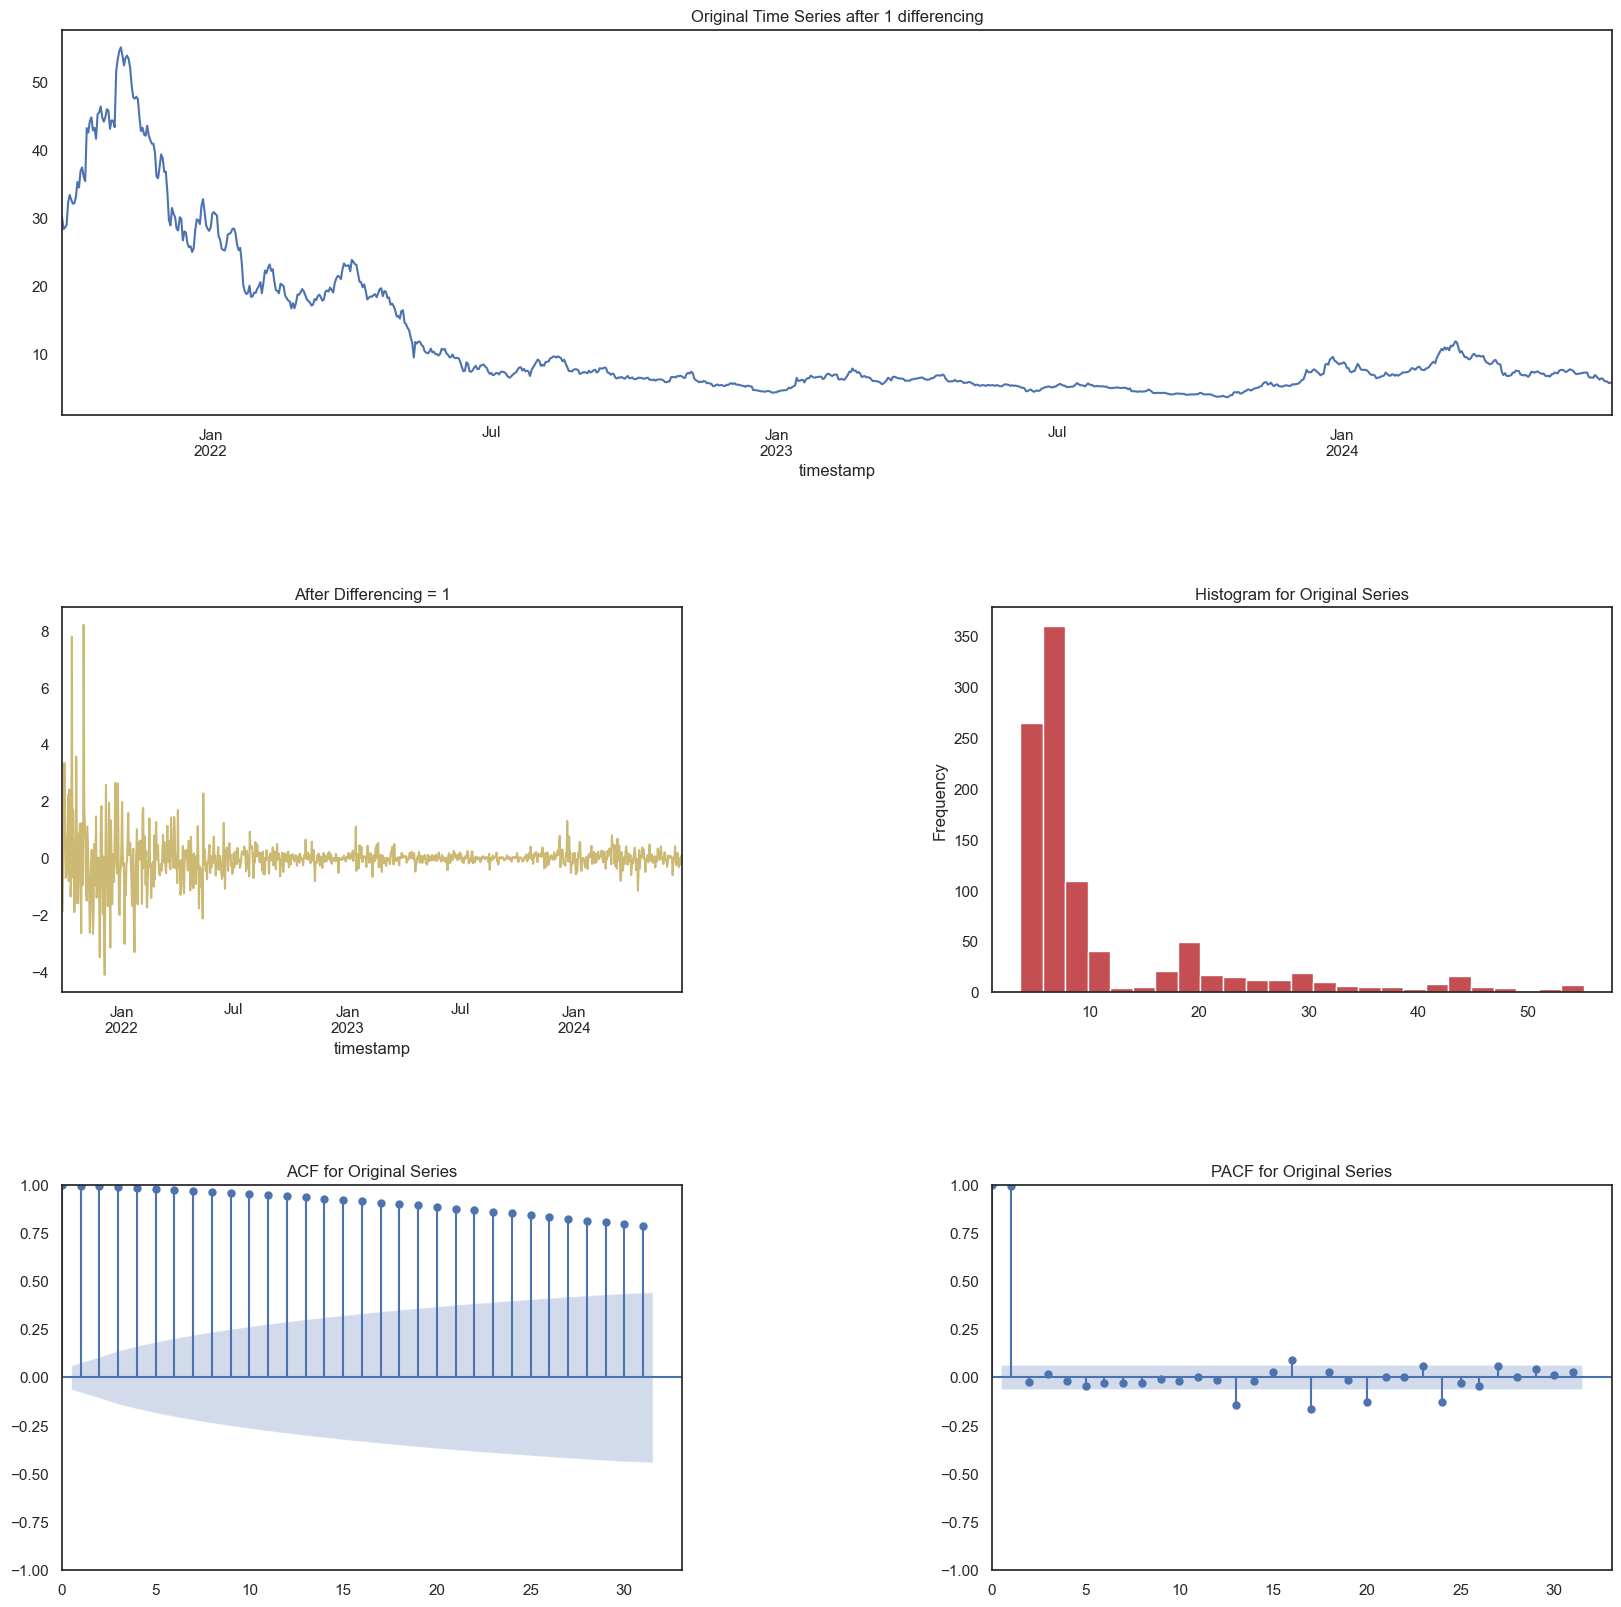

21:21:18 - cmdstanpy - INFO - Chain [1] start processing


Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100}
    Fit-Predict data (shape=(1001, 5)) with Confidence Interval = 0.95...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 2

Fold Number: 1 --> Train Shape: 981 Test Shape: 10


Python(68646) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
21:21:18 - cmdstanpy - INFO - Chain [1] done processing
21:21:19 - cmdstanpy - INFO - Chain [1] start processing


    RMSE = 0.56
    Std Deviation of actuals = 0.32
    Normalized RMSE (as pct of std dev) = 177%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 991 Test Shape: 10


Python(68647) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
21:21:19 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 1.32
    Std Deviation of actuals = 0.27
    Normalized RMSE (as pct of std dev) = 497%
Cross Validation window: 2 completed


21:21:20 - cmdstanpy - INFO - Chain [1] start processing



-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 0.89
    MSE (Mean Squared Error = 1.03
    MAPE (Mean Absolute Percent Error) = 14%
    RMSE (Root Mean Squared Error) = 1.0134
    Normalized RMSE (MinMax) = 65%
    Normalized RMSE (as Std Dev of Actuals)= 198%
Time Taken = 2 seconds


Python(68649) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
21:21:20 - cmdstanpy - INFO - Chain [1] done processing


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: False
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 981 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2125.443, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2115.982, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2114.613, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2124.507, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2111.787, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2113.565, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2113.566, Time=0.42 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2113.815, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2114.957, Time=0.14 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.03 sec
 ARIMA

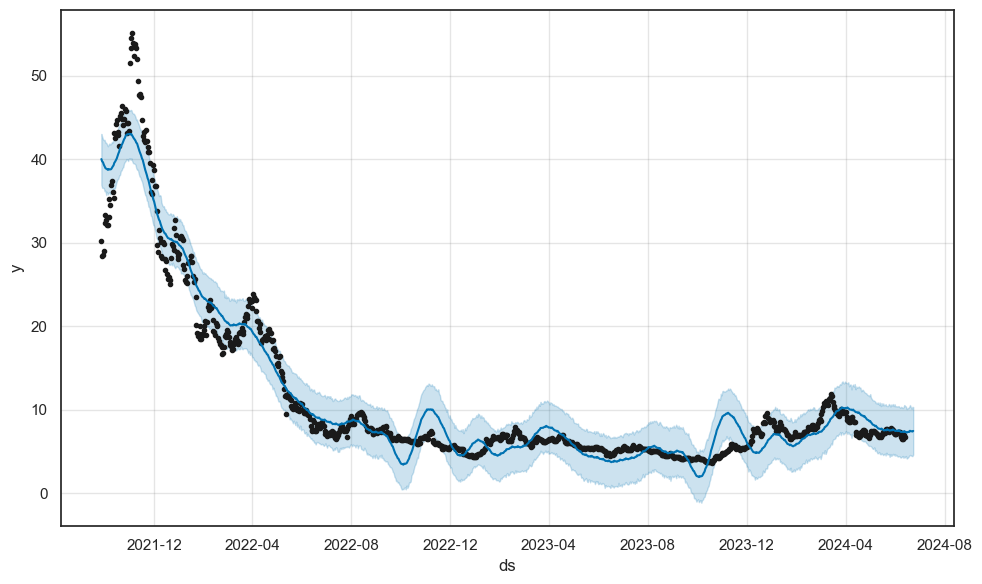

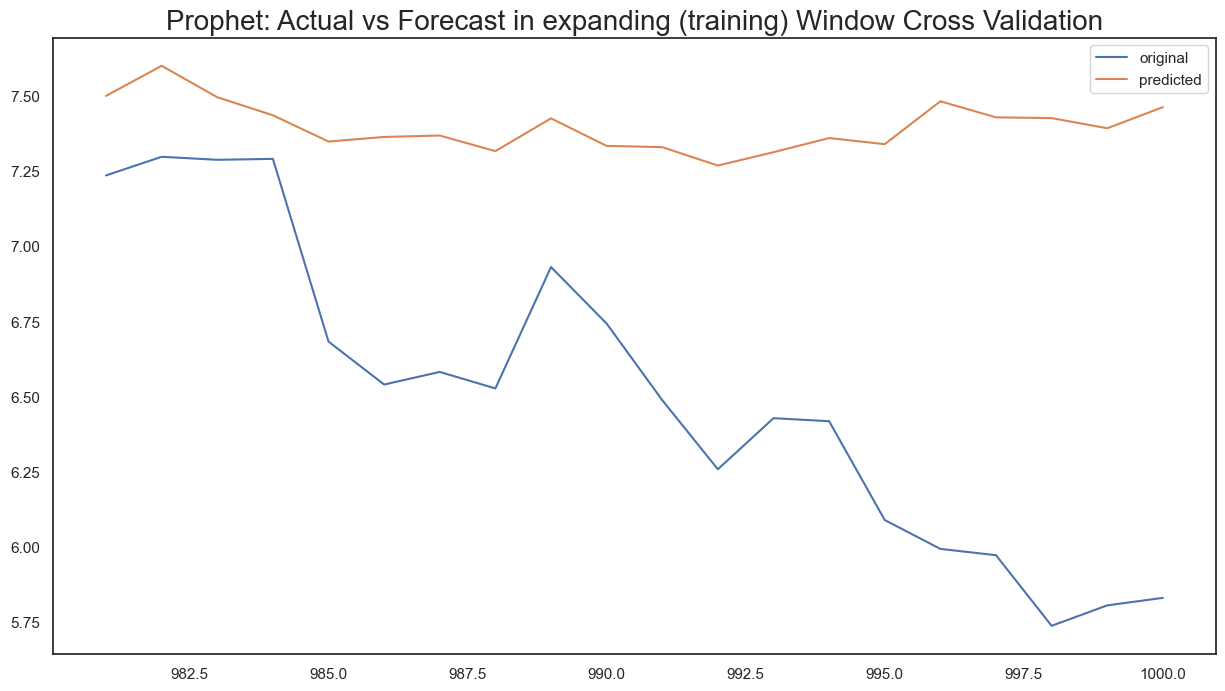

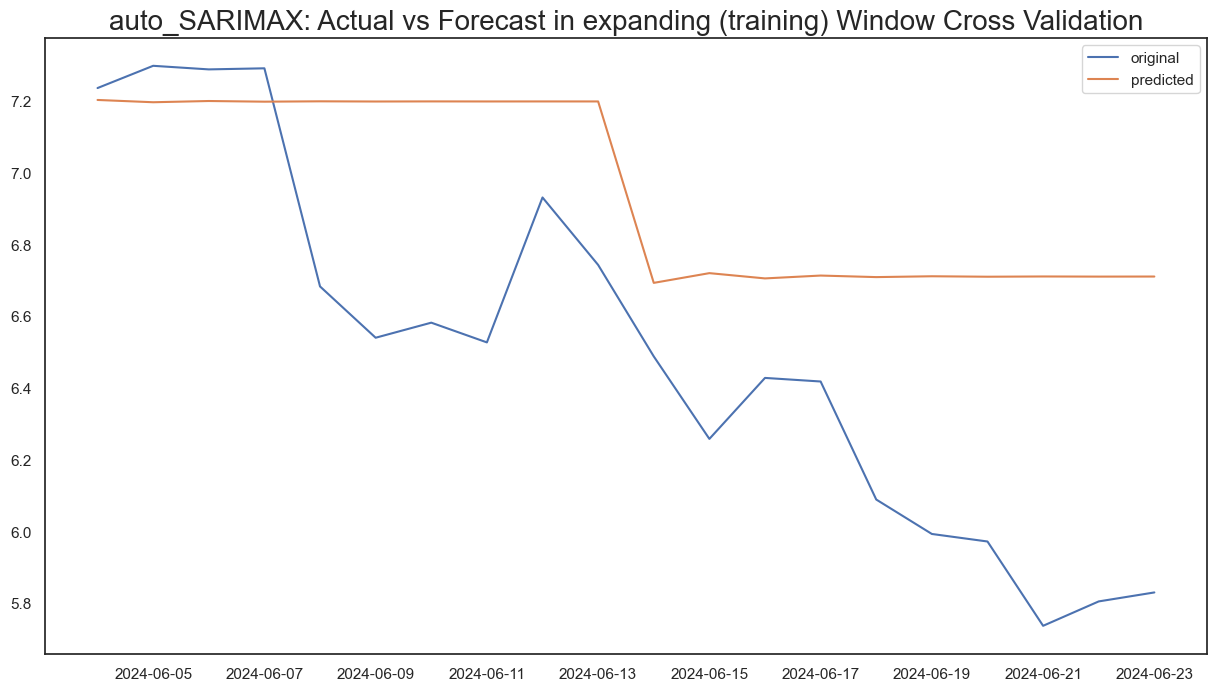

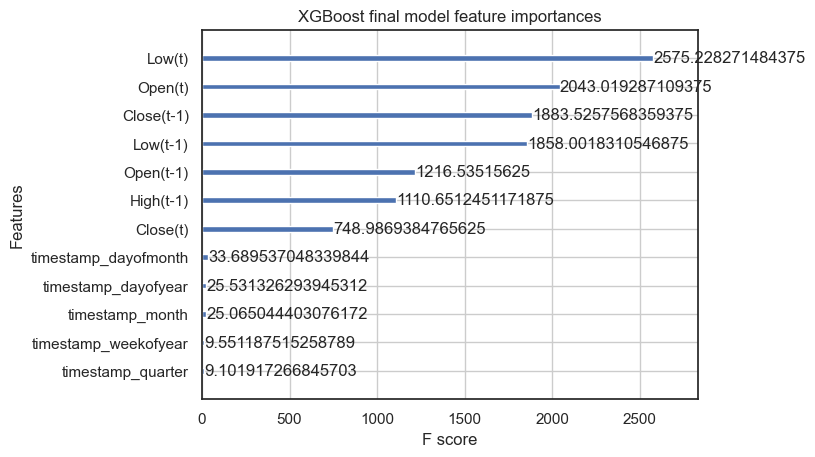

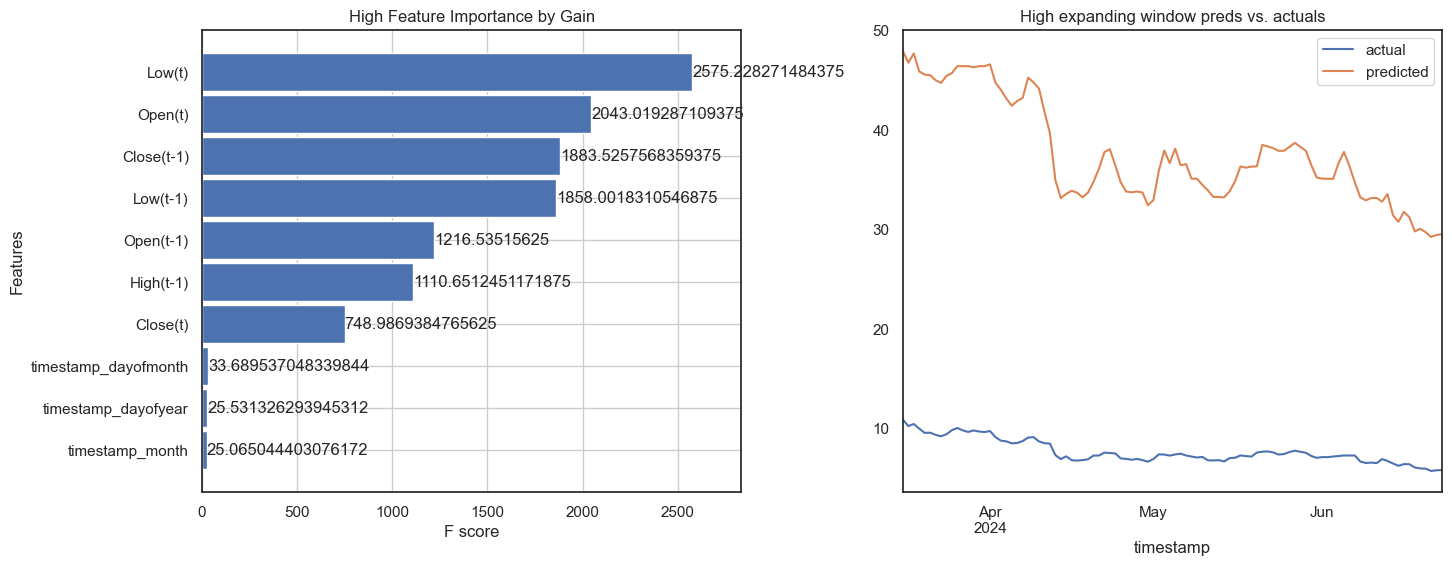

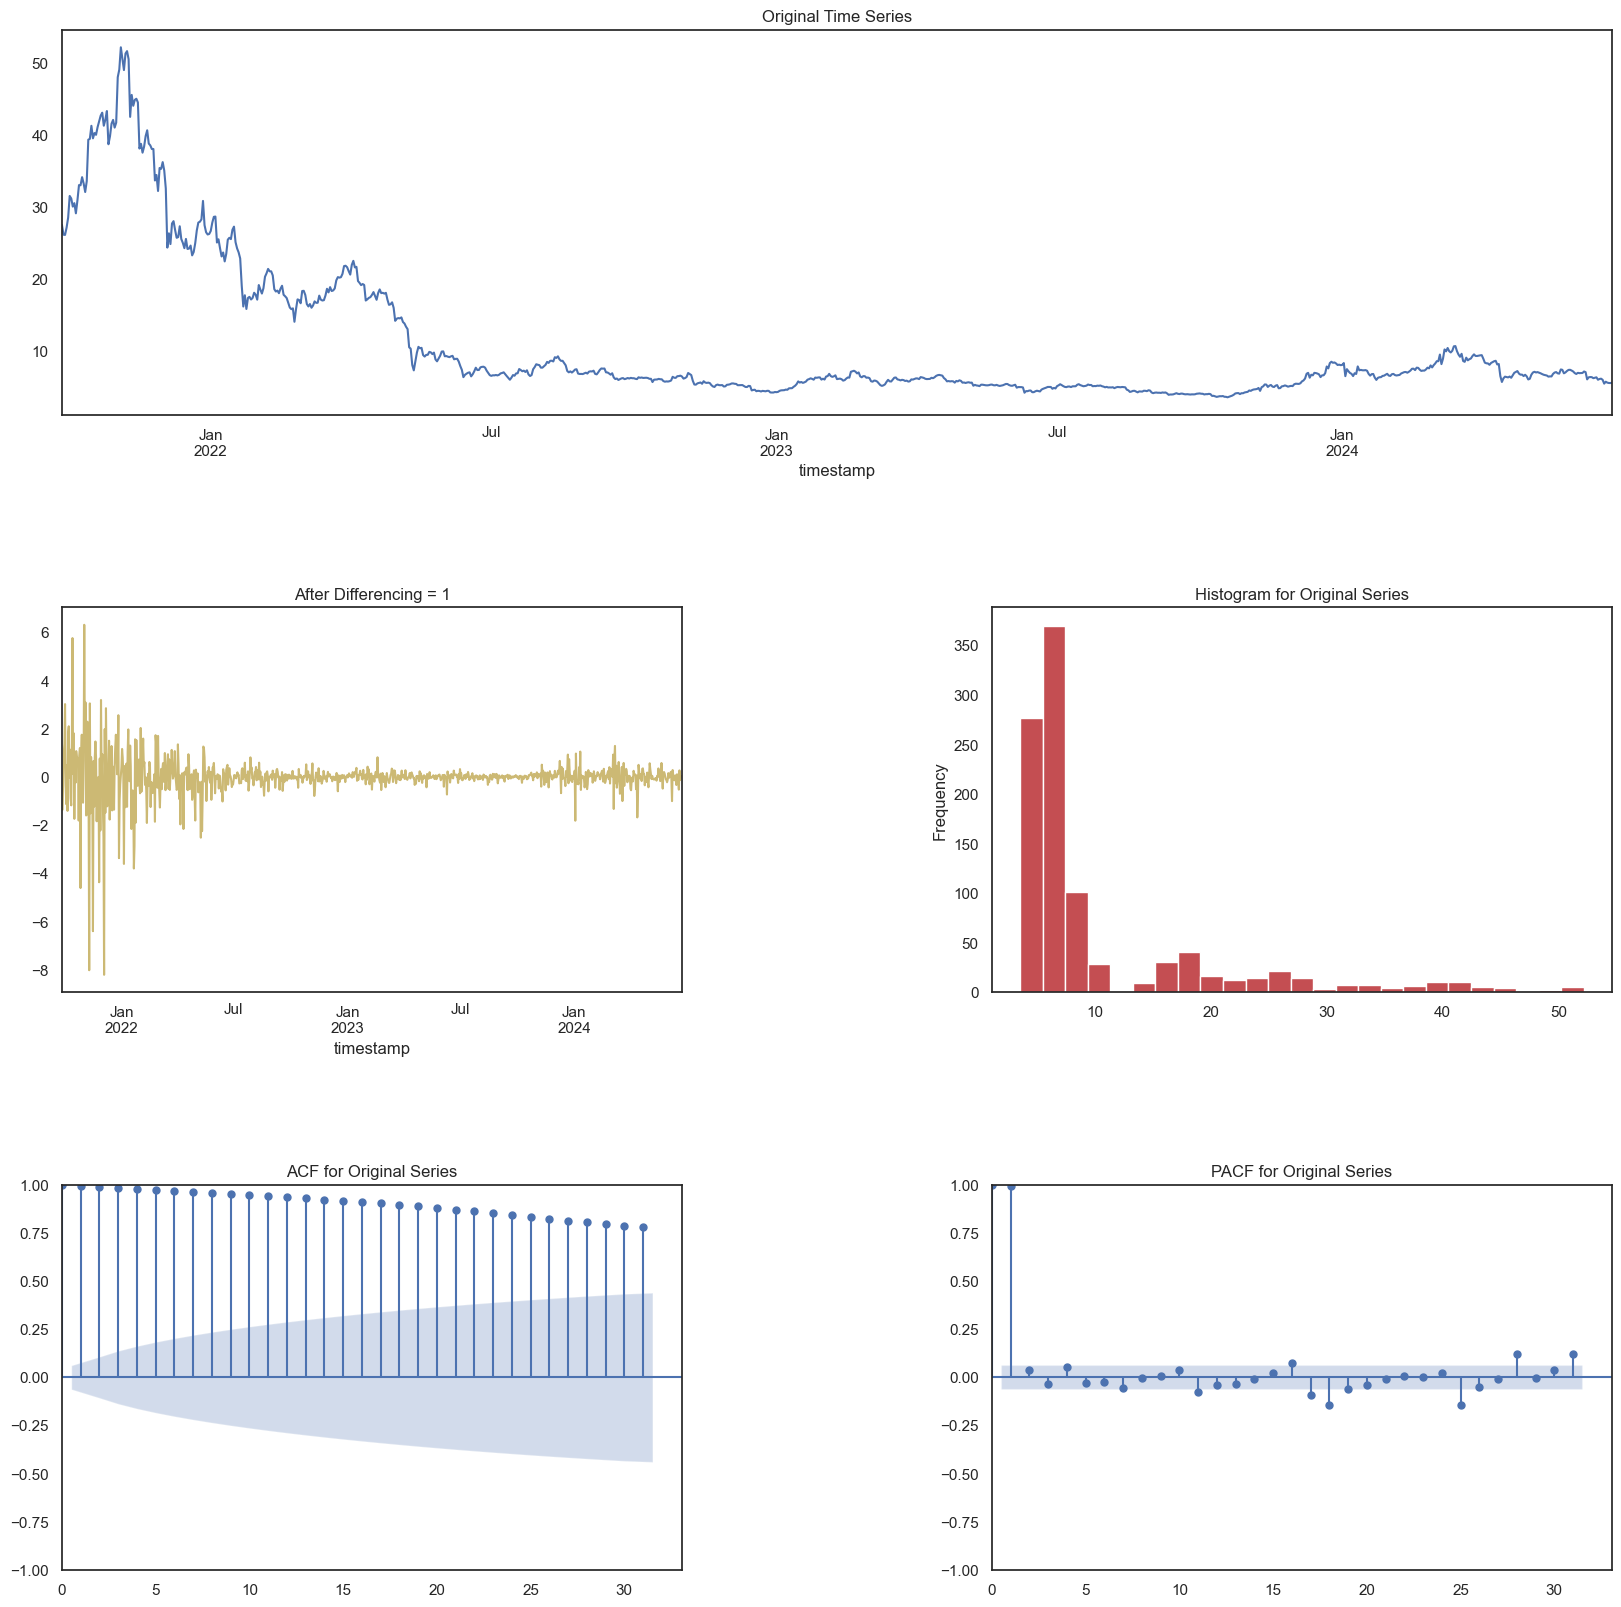

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...
Start of Fit.....
    Target variable given as = Low
Start of loading of data.....
    Inputs: ts_column = timestamp, sep = ,, target = ['Low']
    Using given input: pandas dataframe...
    timestamp column exists in given train data...
    train data shape = (1001, 4)
Alert: Could not detect strf_time_format of timestamp. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model


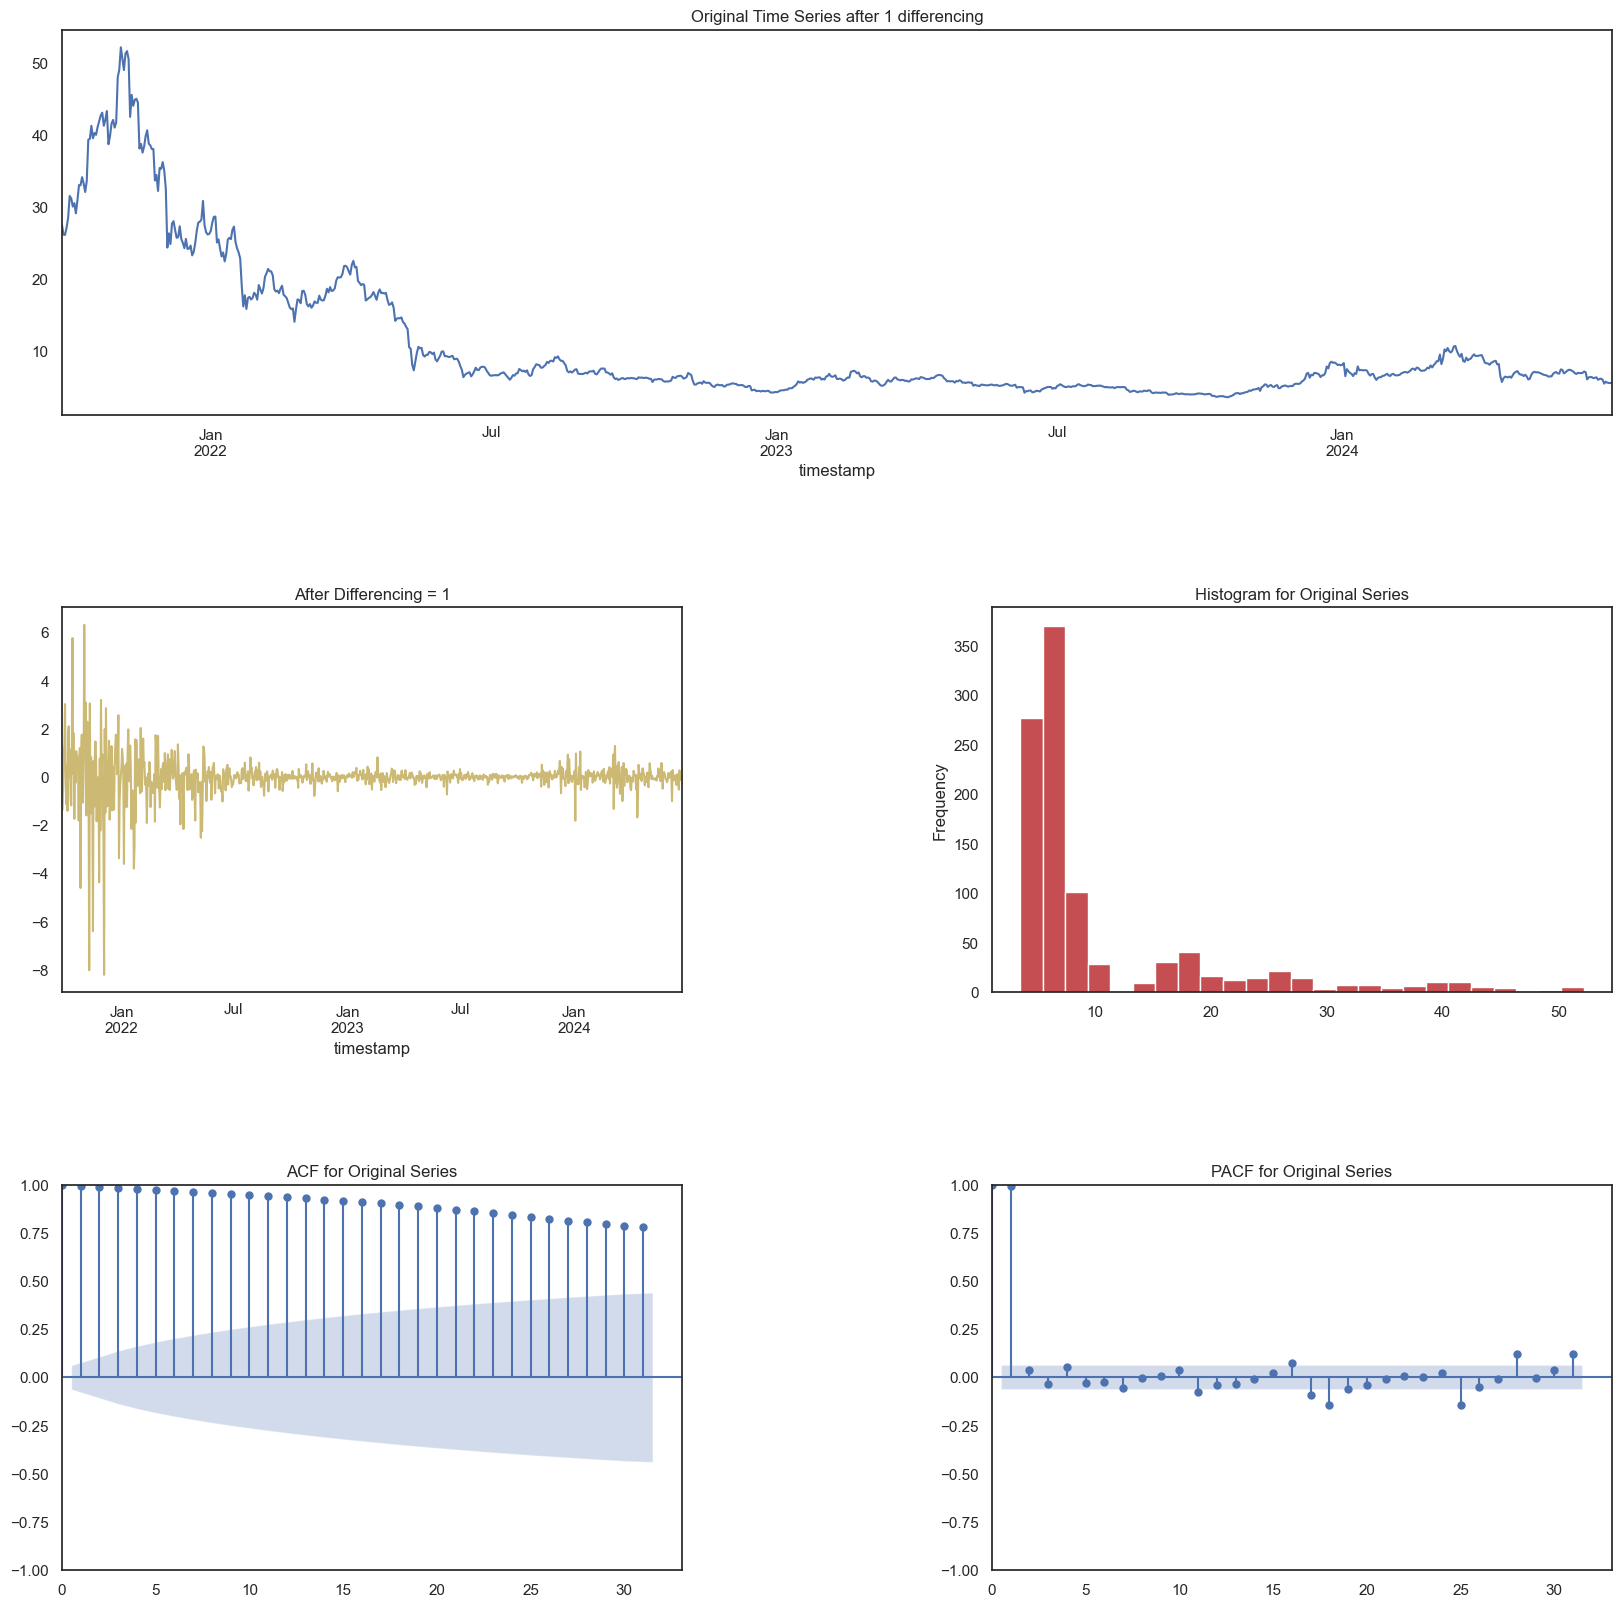

21:21:49 - cmdstanpy - INFO - Chain [1] start processing


Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100}
    Fit-Predict data (shape=(1001, 5)) with Confidence Interval = 0.95...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 2

Fold Number: 1 --> Train Shape: 981 Test Shape: 10


Python(68688) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
21:21:49 - cmdstanpy - INFO - Chain [1] done processing
21:21:50 - cmdstanpy - INFO - Chain [1] start processing


    RMSE = 0.51
    Std Deviation of actuals = 0.37
    Normalized RMSE (as pct of std dev) = 138%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 991 Test Shape: 10


Python(68689) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
21:21:50 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 0.28
    Std Deviation of actuals = 0.25
    Normalized RMSE (as pct of std dev) = 114%
Cross Validation window: 2 completed

-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 0.34
    MSE (Mean Squared Error = 0.17
    MAPE (Mean Absolute Percent Error) = 5%
    RMSE (Root Mean Squared Error) = 0.4107
    Normalized RMSE (MinMax) = 24%
    Normalized RMSE (as Std Dev of Actuals)= 83%
Time Taken = 1 seconds


21:21:51 - cmdstanpy - INFO - Chain [1] start processing
Python(68691) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
21:21:51 - cmdstanpy - INFO - Chain [1] done processing


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: False
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 981 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2383.642, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2384.841, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2384.906, Time=0.14 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2382.292, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2364.384, Time=0.74 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2366.004, Time=0.52 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2366.005, Time=0.51 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2385.123, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2384.677, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2368.379, Time=0.60 sec
 

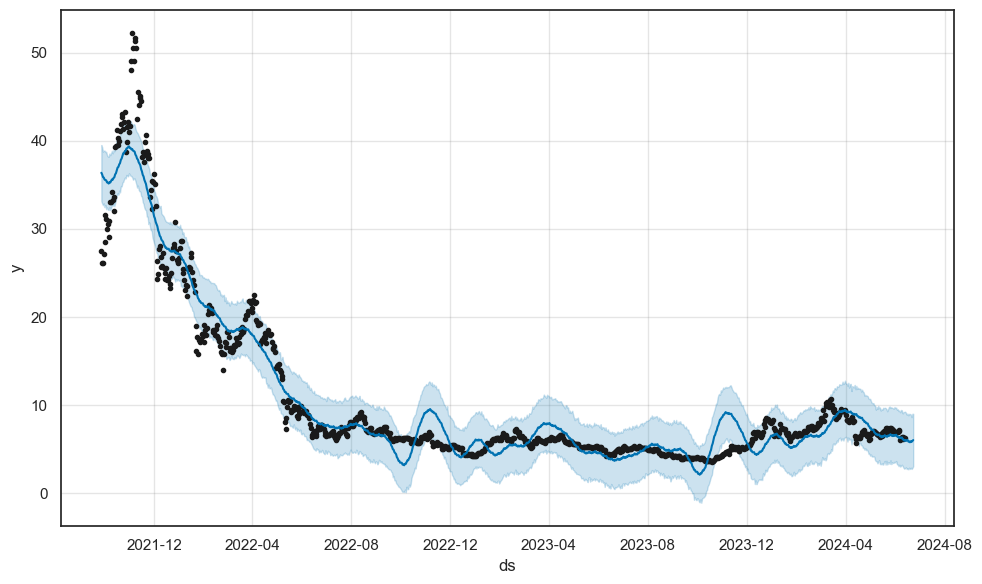

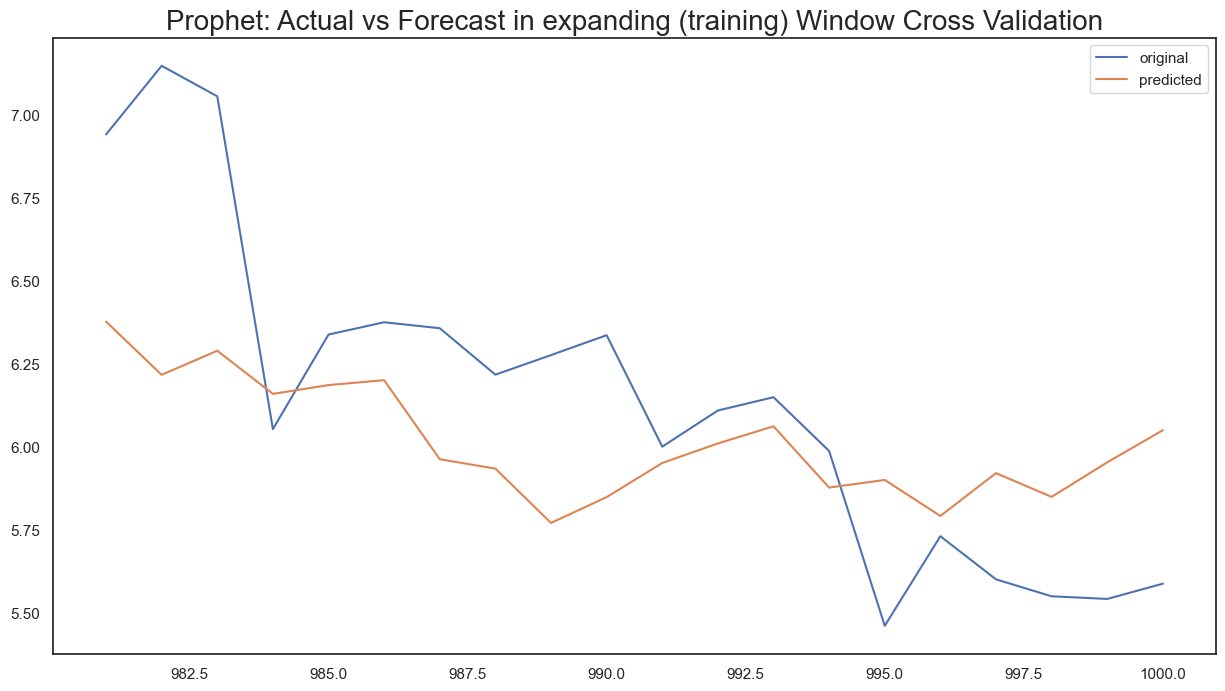

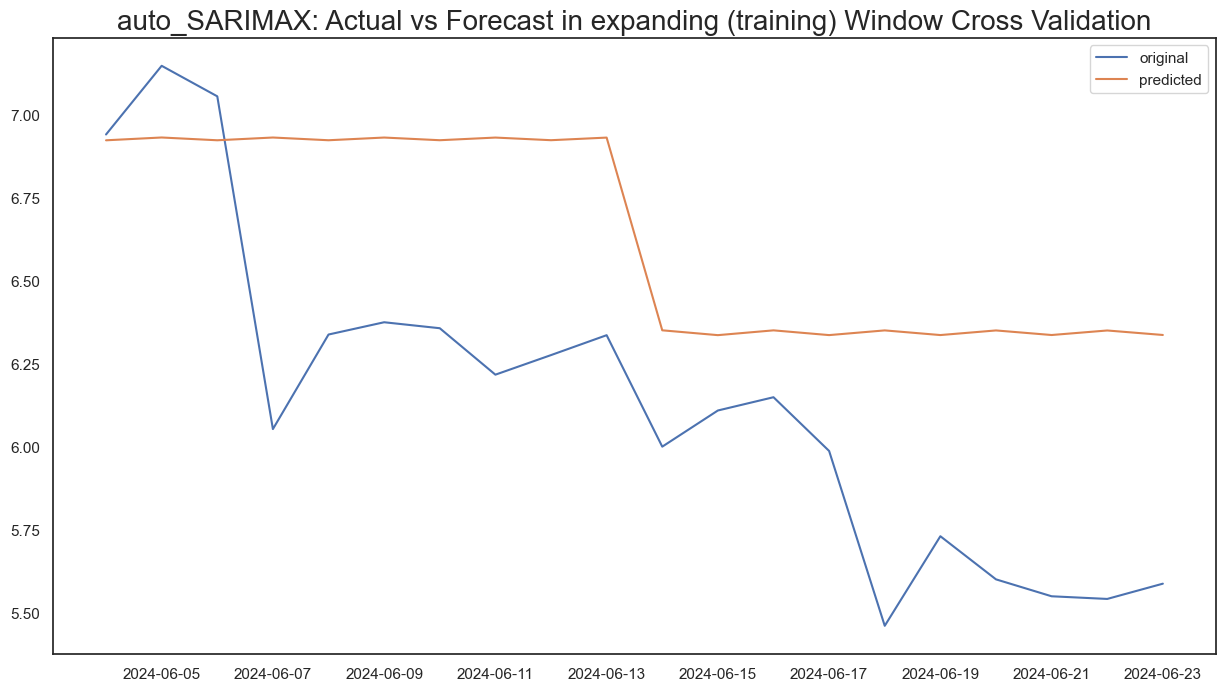

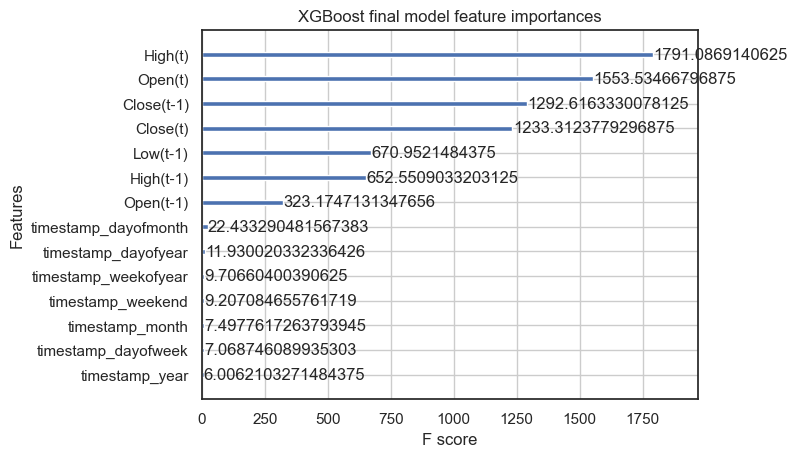

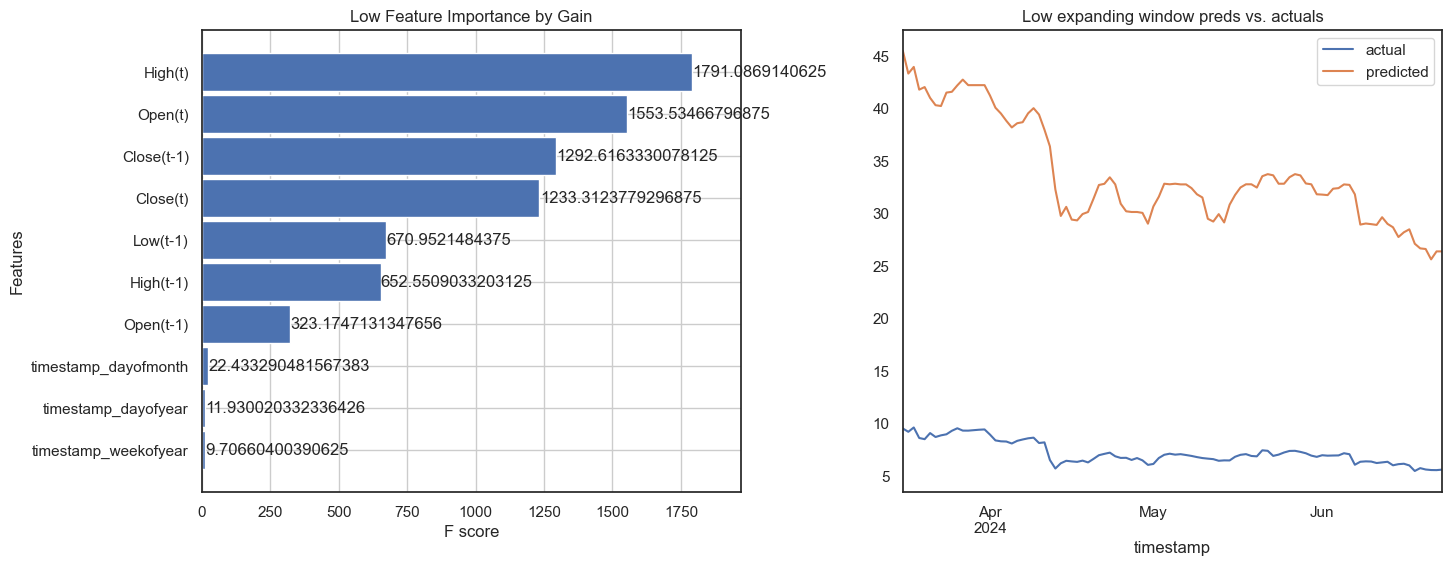

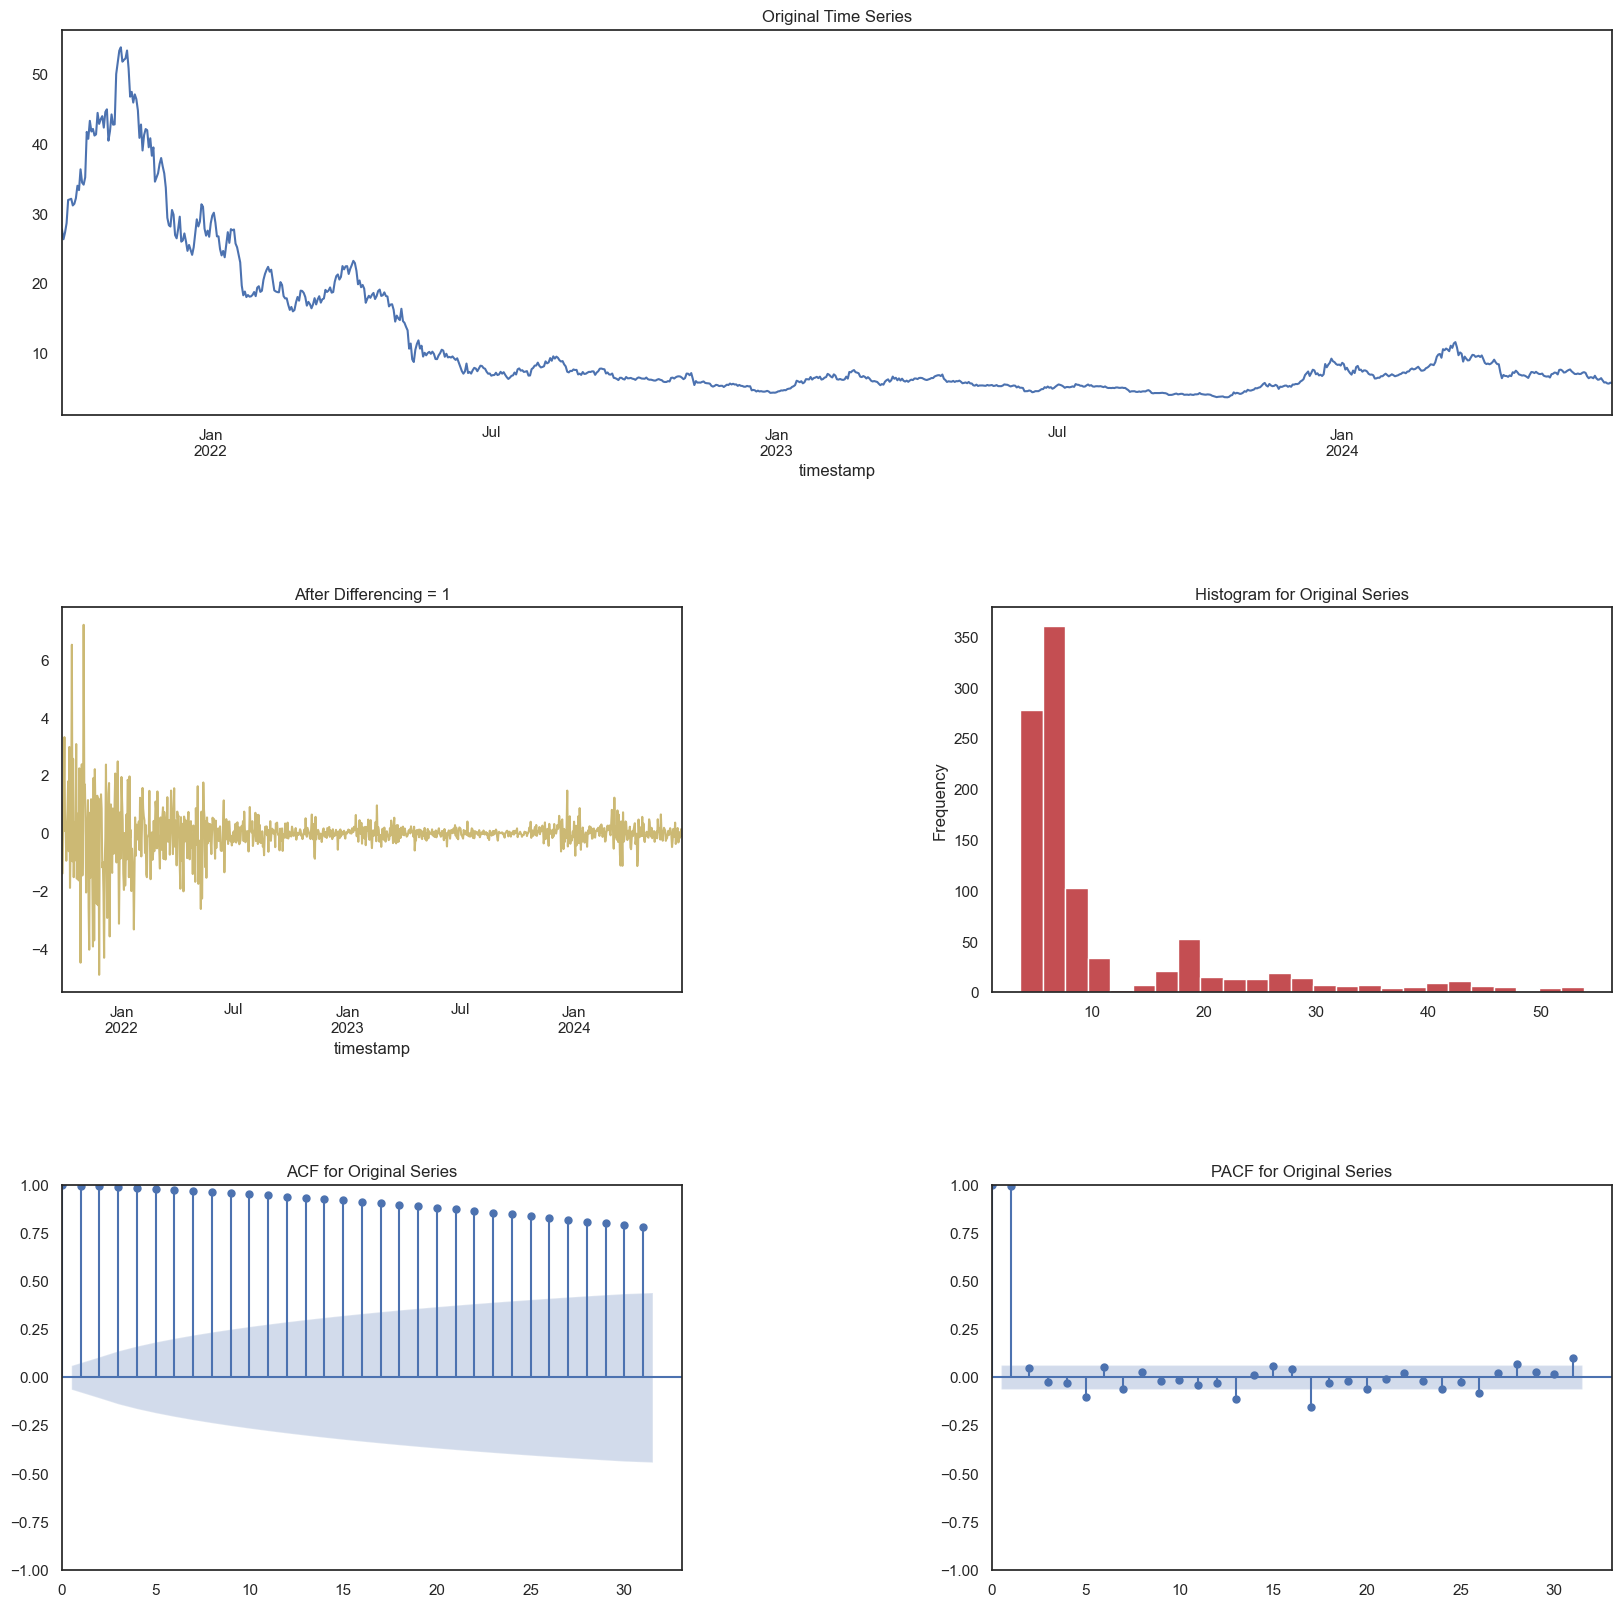

Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...
Start of Fit.....
    Target variable given as = Close
Start of loading of data.....
    Inputs: ts_column = timestamp, sep = ,, target = ['Close']
    Using given input: pandas dataframe...
    timestamp column exists in given train data...
    train data shape = (1001, 4)
Alert: Could not detect strf_time_format of timestamp. Provide strf_time format during "setup" for better results.

Running Augmented Dickey-Fuller test with paramters:
    maxlag: 31 regression: c autolag: BIC
Data is stationary after one differencing
There is 1 differencing needed in this datasets for VAR model


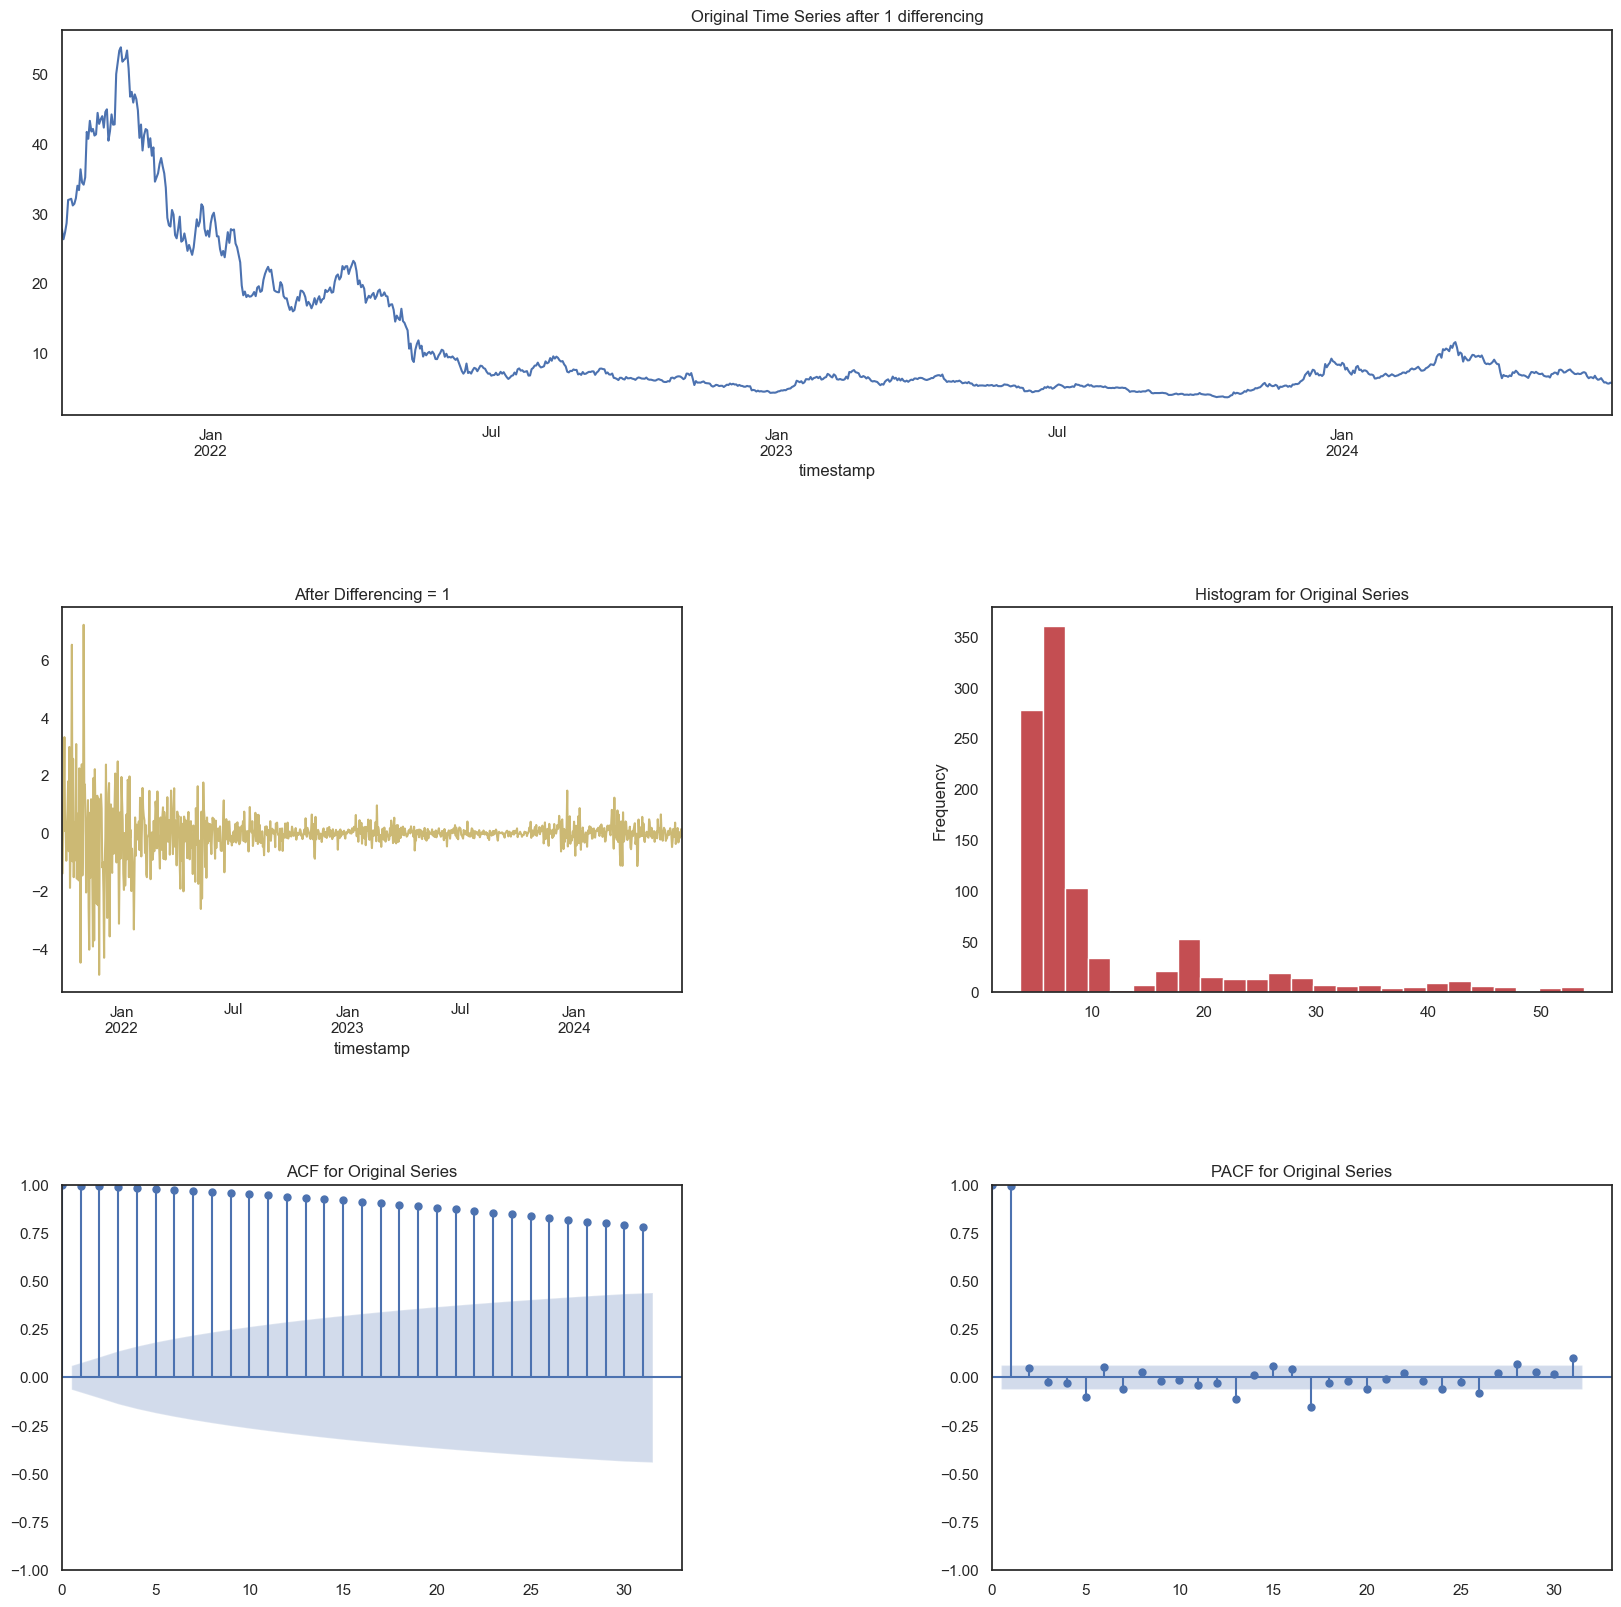

21:22:19 - cmdstanpy - INFO - Chain [1] start processing


Time Interval is given as D
    Correct Time interval given as a valid Pandas date-range frequency...


Building Prophet Model



Running Facebook Prophet Model...
kwargs for Prophet model: {'iter': 100}
    Fit-Predict data (shape=(1001, 5)) with Confidence Interval = 0.95...
  Starting Prophet Fit
      No seasonality assumed since seasonality flag is set to False
  Starting Prophet Cross Validation
Max. iterations using expanding window cross validation = 2

Fold Number: 1 --> Train Shape: 981 Test Shape: 10


Python(68759) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
21:22:19 - cmdstanpy - INFO - Chain [1] done processing
21:22:20 - cmdstanpy - INFO - Chain [1] start processing


    RMSE = 0.43
    Std Deviation of actuals = 0.33
    Normalized RMSE (as pct of std dev) = 129%
Cross Validation window: 1 completed

Fold Number: 2 --> Train Shape: 991 Test Shape: 10


Python(68760) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
21:22:20 - cmdstanpy - INFO - Chain [1] done processing


    RMSE = 1.32
    Std Deviation of actuals = 0.27
    Normalized RMSE (as pct of std dev) = 496%
Cross Validation window: 2 completed

-------------------------------------------
Model Cross Validation Results:
-------------------------------------------
    MAE (Mean Absolute Error = 0.83
    MSE (Mean Squared Error = 0.96
    MAPE (Mean Absolute Percent Error) = 14%
    RMSE (Root Mean Squared Error) = 0.9810
    Normalized RMSE (MinMax) = 60%
    Normalized RMSE (as Std Dev of Actuals)= 190%
Time Taken = 1 seconds


21:22:20 - cmdstanpy - INFO - Chain [1] start processing
Python(68762) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
21:22:21 - cmdstanpy - INFO - Chain [1] done processing


  End of Prophet Fit


Building Auto SARIMAX Model



Running Auto SARIMAX Model...


Best Parameters:
p: None, d: None, q: None
P: None, D: None, Q: None
Seasonality: False
Seasonal Period: 12

Fold Number: 1 --> Train Shape: 981 Test Shape: 10

    Finding the best parameters using AutoArima:
Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2306.710, Time=0.11 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2307.205, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2307.234, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2305.422, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2300.410, Time=0.37 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2311.123, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2311.132, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2309.130, Time=0.13 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2309.125, Time=0.12 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2302.862, Time=1.07 sec
 

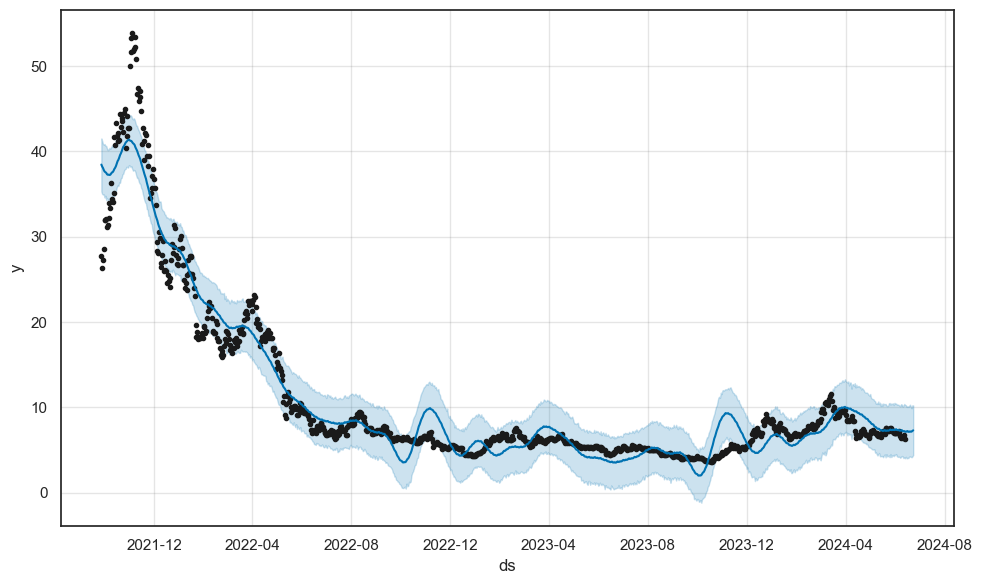

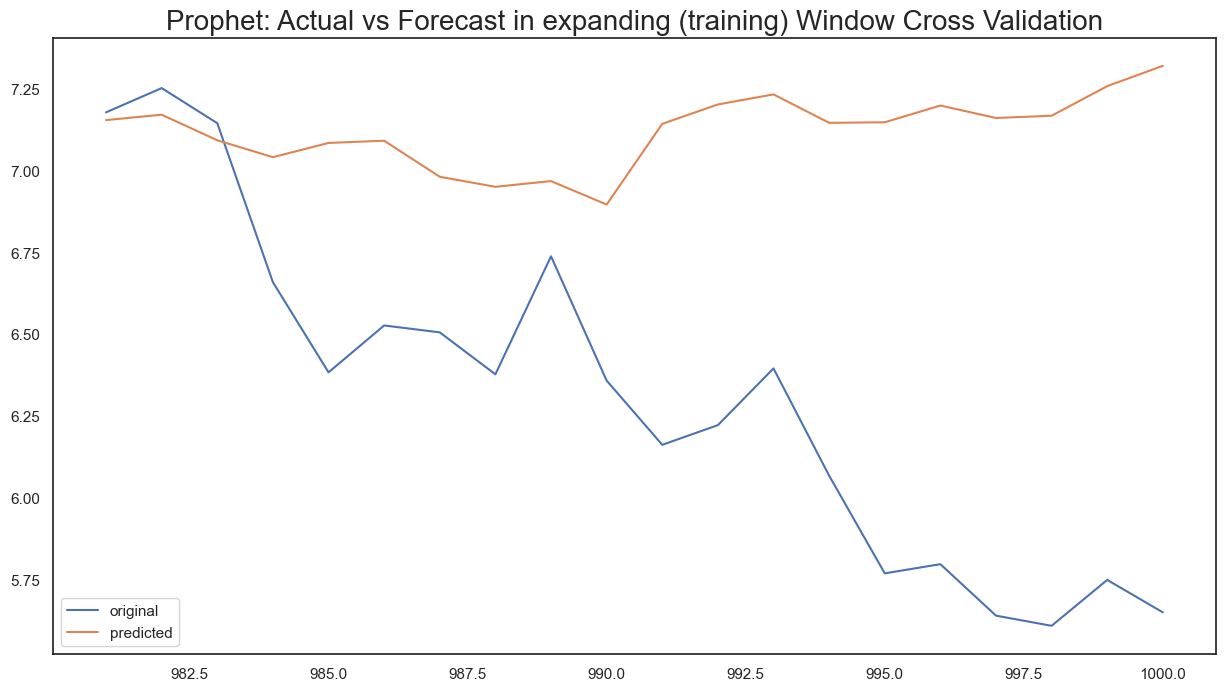

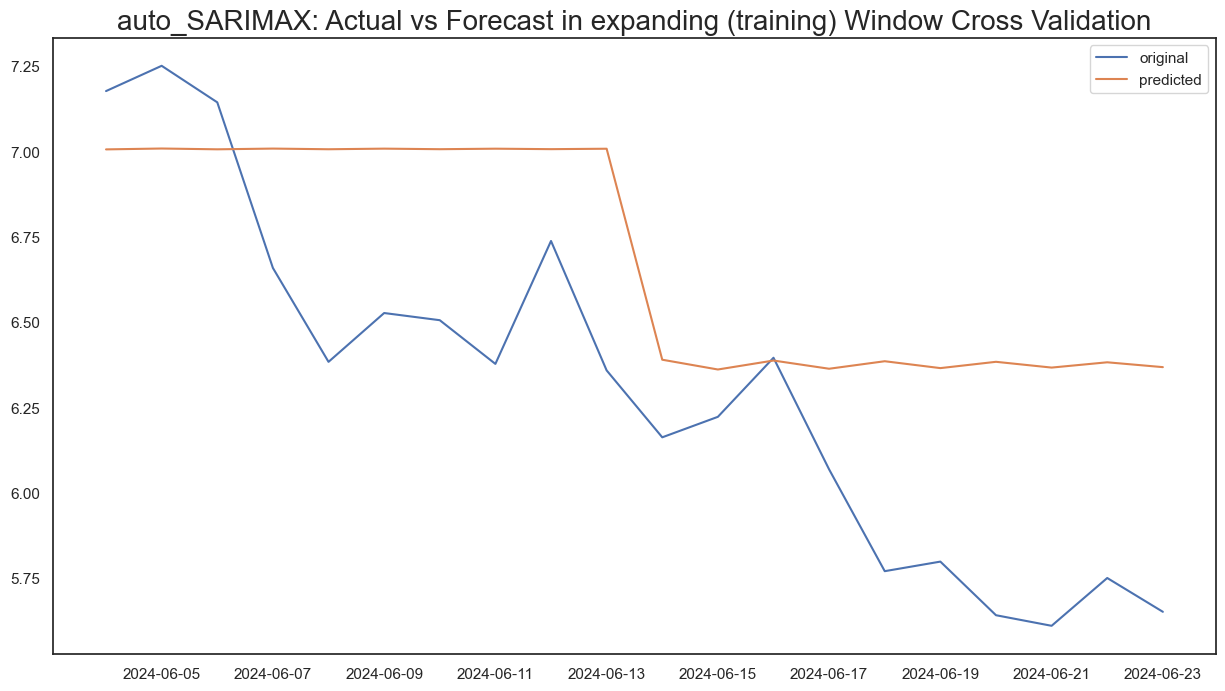

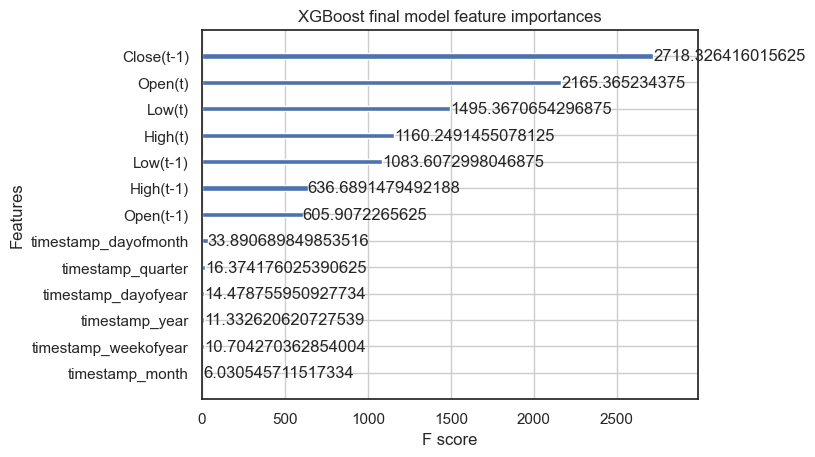

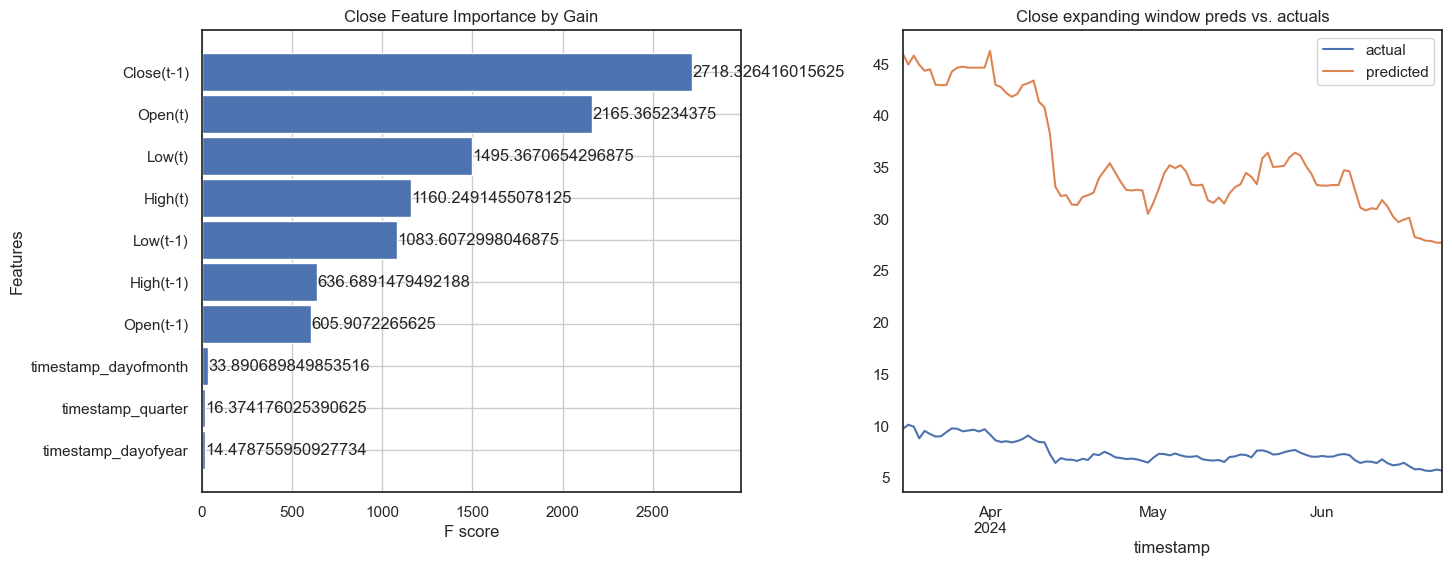

In [192]:
cv = 2
# Iterar sobre cada columna seleccionada
for column in columns_to_predict:
    # Excluir 'Open_time' del bucle de iteración
    if column != 'Open_time':
        model = auto_timeseries(score_type='rmse', time_interval='D',
                                non_seasonal_pdq=None, seasonality=False,
                                model_type='SARIMAX', verbose=2, forecast_period=n_days_to_predict)
        
        try:#TODO: Probar con CV = 2/5/10 y model VAR/SARIMAX solamente <= ver si puedo correr todos con SARIMAX
            model.fit(features, ts_column='timestamp', target=column, cv=cv)
        except:
            model = auto_timeseries(score_type='rmse', time_interval='D',
                                non_seasonal_pdq=None, seasonality=False,
                                model_type='best', verbose=2, forecast_period=n_days_to_predict)
            model.fit(features, ts_column='timestamp', target=column, cv=cv)
        
        # Guardar el modelo en el diccionario
        trained_models[column] = model

#### Hago las predicciones a futuro

In [208]:
def calcular_indicadores_tecnicos(historico_precio):
    close_prices = np.array(historico_precio['Close'], dtype=np.double)
    high_prices = np.array(historico_precio['High'], dtype=np.double)
    low_prices = np.array(historico_precio['Low'], dtype=np.double)
    
    # Media Móvil Simple (SMA)
    sma_20 = talib.SMA(close_prices, timeperiod=20)
    
    # Media Móvil Exponencial (EMA)
    ema_20 = talib.EMA(close_prices, timeperiod=20)
    
    # Bandas de Bollinger
    upper_band, middle_band, lower_band = talib.BBANDS(close_prices, timeperiod=20, nbdevup=2, nbdevdn=2)
    
    # Índice de Fuerza Relativa (RSI)
    rsi = talib.RSI(close_prices, timeperiod=14)
    
    # MACD (Convergencia/Divergencia de Medias Móviles)
    macd, signal, _ = talib.MACD(close_prices, fastperiod=12, slowperiod=26, signalperiod=9)
    
    # ADX (Índice Direccional Promedio)
    adx = talib.ADX(high_prices, low_prices, close_prices, timeperiod=14)
    
    # Estocástico
    slowk, slowd = talib.STOCH(high_prices, low_prices, close_prices, fastk_period=14, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
    
    # Índice de Canal de Materias Primas 
    cci = talib.CCI(high_prices, low_prices, close_prices, timeperiod=14)
    
    # ATR (Average True Range)
    atr = talib.ATR(high_prices, low_prices, close_prices, timeperiod=14)
    
    indicadores = pd.DataFrame({
        'SMA_20': sma_20,
        'EMA_20': ema_20,
        'Upper_Band': upper_band,
        'Middle_Band': middle_band,
        'Lower_Band': lower_band,
        'RSI': rsi,
        'MACD': macd,
        'Signal': signal,
        'ADX': adx,
        'SlowK': slowk,
        'SlowD': slowd,
        'CCI': cci,
        'ATR': atr
    }, index=historico_precio.index)
    
    return indicadores

In [209]:
forecast_results = {}

for column in columns_to_predict:
    future_predictions = trained_models[column].predict(testdata=features[-10:])
    forecast_results[column] = future_predictions

# Mostrar los resultados del pronóstico
for column, predictions in forecast_results.items():
    print(f"Pronóstico para la columna '{column}':")
    display(predictions)
    print()

Predicting using test dataframe as input for auto_SARIMAX model
"['Close'] not in index"
Model was trained with train dataframe. Please make sure you are passing a test data frame.
Predicting using test dataframe as input for auto_SARIMAX model
"['Close'] not in index"
Model was trained with train dataframe. Please make sure you are passing a test data frame.
Predicting using test dataframe as input for Prophet model
(Error): You have not provided the time_column values. This will result in an error
Building Forecast dataframe. Forecast Period = 10
Model is erroring during prediction. Check inputs and try again.
Predicting using test dataframe as input for auto_SARIMAX model
Pronóstico para la columna 'Open':


None


Pronóstico para la columna 'High':


None


Pronóstico para la columna 'Low':


None


Pronóstico para la columna 'Close':


Close,yhat,mean_se,mean_ci_lower,mean_ci_upper
2024-06-24,6.143,0.365,5.427,6.859
2024-06-25,6.128,0.431,5.283,6.973
2024-06-26,6.244,0.493,5.278,7.210
2024-06-27,6.075,0.547,5.002,7.147
2024-06-28,5.831,0.597,4.661,7.000
2024-06-29,5.852,0.642,4.593,7.111
2024-06-30,5.768,0.685,4.426,7.111
2024-07-01,5.709,0.725,4.287,7.130
2024-07-02,5.808,0.763,4.312,7.303
2024-07-03,5.789,0.799,4.223,7.356


In [210]:
for column, model in trained_models.items():
    # Guarda el modelo en un archivo usando dill
    with open(f"auto_ts_models/{column}.pkl", "wb") as file:
        dill.dump(model, file)

In [211]:
predictions_df = pd.DataFrame()

for column, predictions in forecast_results.items():
    predictions_df[column] = predictions['yhat'].values

fechas = [nueva_fecha + timedelta(days=i) for i in range(1, 11)]
df_fechas = pd.DataFrame({'timestamp': fechas})

# Añadir la columna de timestamp
predictions_df['Open_time'] = df_fechas['timestamp'].values

display(predictions_df)

TypeError: 'NoneType' object is not subscriptable

In [ ]:
nuevo_df.tail()

,Open_time,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Open_BTCUSDT,High_BTCUSDT,Low_BTCUSDT,Close_BTCUSDT,Volume_BTCUSDT,Quote_asset_volume_BTCUSDT,Number_of_trades_BTCUSDT,Open_ETHUSDT,High_ETHUSDT,Low_ETHUSDT,Close_ETHUSDT,Volume_ETHUSDT,Quote_asset_volume_ETHUSDT,Number_of_trades_ETHUSDT,Open_BNBUSDT,High_BNBUSDT,Low_BNBUSDT,Close_BNBUSDT,Volume_BNBUSDT,Quote_asset_volume_BNBUSDT,Number_of_trades_BNBUSDT,SMA_20,EMA_20,Upper_Band,Middle_Band,Lower_Band,RSI,MACD,Signal,ADX,SlowK,SlowD,CCI,ATR,MFI,buy_1000x_high_coinbase,sell_1000x_high_coinbase,total_trades_coinbase,Sentimiento,Tweets_Utilizados,Cantidad_pos,Cantidad_neg,Cantidad_neu,Compound total,Sentimiento_coin,Tweets_Utilizados_coin,Cantidad_pos_coin,Cantidad_neg_coin,Cantidad_neu_coin,Compound total coin,Sentimiento_referentes,Tweets_Utilizados_referentes,Cantidad_pos_referentes,Cantidad_neg_referentes,Cantidad_neu_referentes,Compound total referentes,Tweets_Utilizados_whale_alert,Buy_1000x_high,sell_1000x_high,total_trades_binance,Tendencia
996,2024-06-19,5.771,5.993,5.730,5.799,4114058.810,24212639.522,71171.000,65175.320,65727.540,64666.000,64974.370,20060.796,1307731953.955,1078458.000,3483.420,3590.010,3465.650,3560.510,321500.003,1138419054.653,712501.000,588.600,605.900,586.600,599.300,260529.062,155686523.002,302529.000,6.579,6.460,7.462,6.579,5.696,33.644,-0.284,-0.184,25.268,13.897,16.591,-142.730,0.370,31.081,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Lateral
997,2024-06-20,5.798,5.972,5.600,5.642,3352117.740,19440549.488,85229.000,64974.370,66482.940,64559.150,64869.990,24265.290,1584896152.166,1282687.000,3560.510,3625.960,3486.000,3513.080,329117.845,1170597741.258,743896.000,599.300,608.000,584.600,587.700,289498.772,172878669.790,300306.000,6.512,6.382,7.463,6.512,5.561,31.590,-0.316,-0.212,25.180,15.125,15.639,-145.197,0.370,30.946,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Bajista
998,2024-06-21,5.643,5.737,5.549,5.611,3503011.610,19780172.906,75499.000,64869.990,65066.660,63379.350,64143.560,25993.564,1665541539.709,1362617.000,3513.080,3547.550,3446.820,3518.500,342155.102,1197095546.234,746361.000,587.700,589.300,577.800,586.100,191182.614,111683509.520,231903.000,6.440,6.309,7.433,6.440,5.447,31.902,-0.338,-0.237,26.323,12.907,13.976,-142.161,0.356,33.912,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Lateral
999,2024-06-22,5.612,5.805,5.541,5.751,2939866.910,16717617.250,59425.000,64143.560,64546.810,63943.820,64262.010,7308.955,470027247.340,562832.000,3518.500,3521.190,3475.090,3495.750,115774.616,405045499.422,315684.000,586.200,591.400,581.000,591.100,100439.584,58889744.988,146230.000,6.378,6.258,7.380,6.378,5.375,36.333,-0.343,-0.262,26.894,13.329,13.787,-101.923,0.351,39.006,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Alcista
1000,2024-06-23,5.752,5.830,5.587,5.652,1702329.170,9742415.155,43147.000,64262.010,64521.000,63178.320,63210.010,8224.454,526848525.003,592759.000,3495.760,3521.450,3406.380,3420.910,133411.430,463204539.056,338679.000,591.100,593.200,576.000,577.500,141025.834,82700074.158,187493.000,6.310,6.203,7.316,6.310,5.304,35.148,-0.354,-0.288,27.229,14.367,13.534,-86.225,0.345,35.096,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,Bajista


In [ ]:
final_df = pd.concat([nuevo_df[['Open_time'] + columns_to_predict], predictions_df], ignore_index=True)

In [ ]:
final_df['Open_time'] = pd.to_datetime(final_df['Open_time']).dt.date
display(final_df.tail(15))

,Open_time,Open,High,Low,Close
996,2024-06-19,5.771,5.993,5.730,5.799
997,2024-06-20,5.798,5.972,5.600,5.642
998,2024-06-21,5.643,5.737,5.549,5.611
999,2024-06-22,5.612,5.805,5.541,5.751
1000,2024-06-23,5.752,5.830,5.587,5.652
1001,2024-06-24,6.105,6.464,6.030,6.004
1002,2024-06-25,5.932,6.355,6.102,6.020
1003,2024-06-26,5.957,6.509,6.168,6.133
1004,2024-06-27,6.132,6.421,5.996,5.939
1005,2024-06-28,5.817,6.153,6.032,5.620


In [ ]:
indicadores_tecnicos = calcular_indicadores_tecnicos(final_df)
display(indicadores_tecnicos)

,SMA_20,EMA_20,Upper_Band,Middle_Band,Lower_Band,RSI,MACD,Signal,ADX,SlowK,SlowD,CCI,ATR
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,6.033,6.076,6.669,6.033,5.396,43.244,-0.252,-0.280,21.609,33.702,38.978,-15.594,0.373
1007,5.997,6.048,6.603,5.997,5.391,41.558,-0.245,-0.273,20.753,28.780,33.434,-7.825,0.361
1008,5.962,6.014,6.556,5.962,5.368,39.836,-0.245,-0.267,20.147,30.860,31.114,-33.884,0.353
1009,5.913,5.989,6.394,5.913,5.432,41.652,-0.236,-0.261,19.202,24.851,28.164,0.737,0.362


In [ ]:
ultimos_indicadores = indicadores_tecnicos.tail(10)
ultimos_indicadores = ultimos_indicadores.reset_index(drop=True)
merged_last_10 = pd.concat([predictions_df, ultimos_indicadores], axis=1)
display(merged_last_10)

,Open,High,Low,Close,Open_time,SMA_20,EMA_20,Upper_Band,Middle_Band,Lower_Band,RSI,MACD,Signal,ADX,SlowK,SlowD,CCI,ATR
0,6.105,6.464,6.030,6.004,2024-06-24,6.251,6.188,7.183,6.251,5.320,42.937,-0.332,-0.309,28.758,23.282,16.993,22.826,0.381
1,5.932,6.355,6.102,6.020,2024-06-25,6.190,6.172,7.004,6.190,5.376,43.315,-0.304,-0.308,27.049,29.375,22.341,25.861,0.379
2,5.957,6.509,6.168,6.133,2024-06-26,6.139,6.168,6.826,6.139,5.453,46.129,-0.270,-0.300,25.269,42.510,31.722,64.509,0.387
3,6.132,6.421,5.996,5.939,2024-06-27,6.103,6.146,6.751,6.103,5.455,42.261,-0.256,-0.291,23.849,45.412,39.099,34.655,0.389
4,5.817,6.153,6.032,5.620,2024-06-28,6.065,6.096,6.732,6.065,5.398,36.788,-0.267,-0.287,22.531,37.819,41.914,-13.178,0.377
5,5.869,5.910,5.938,5.881,2024-06-29,6.033,6.076,6.669,6.033,5.396,43.244,-0.252,-0.280,21.609,33.702,38.978,-15.594,0.373
6,5.914,5.849,6.089,5.785,2024-06-30,5.997,6.048,6.603,5.997,5.391,41.558,-0.245,-0.273,20.753,28.780,33.434,-7.825,0.361
7,5.722,5.745,6.035,5.686,2024-07-01,5.962,6.014,6.556,5.962,5.368,39.836,-0.245,-0.267,20.147,30.860,31.114,-33.884,0.353
8,5.663,5.832,6.162,5.755,2024-07-02,5.913,5.989,6.394,5.913,5.432,41.652,-0.236,-0.261,19.202,24.851,28.164,0.737,0.362
9,5.795,5.832,6.282,5.719,2024-07-03,5.881,5.963,6.322,5.881,5.439,40.960,-0.230,-0.255,18.325,20.658,25.456,9.810,0.374


In [ ]:
## Beta testing
def apply_constraints(predictions):
    for i in range(1, len(predictions['Open'])):
        predictions['Open'][i] = predictions['Close'][i - 1]
    
    # Ajustar predicciones para cumplir restricciones lógicas
    for i in range(len(predictions['Close'])):
        if predictions['Close'][i] < predictions['Low'][i]:
            predictions['Low'][i] = predictions['Close'][i]
        if predictions['High'][i] < predictions['Open'][i]:
            predictions['High'][i] = predictions['Open'][i]
        if predictions['High'][i] < predictions['Close'][i]:
            predictions['High'][i] = predictions['Close'][i]
        if predictions['Low'][i] > predictions['Open'][i]:
            predictions['Low'][i] = predictions['Open'][i]
        if predictions['Low'][i] > predictions['Close'][i]:
            predictions['Low'][i] = predictions['Close'][i]
    return predictions

# Diccionario para almacenar las predicciones
merged_last_10 = apply_constraints(merged_last_10)
display(merged_last_10)

,Open,High,Low,Close,Open_time,SMA_20,EMA_20,Upper_Band,Middle_Band,Lower_Band,RSI,MACD,Signal,ADX,SlowK,SlowD,CCI,ATR
0,6.105,6.464,6.004,6.004,2024-06-24,6.251,6.188,7.183,6.251,5.320,42.937,-0.332,-0.309,28.758,23.282,16.993,22.826,0.381
1,6.004,6.355,6.004,6.020,2024-06-25,6.190,6.172,7.004,6.190,5.376,43.315,-0.304,-0.308,27.049,29.375,22.341,25.861,0.379
2,6.020,6.509,6.020,6.133,2024-06-26,6.139,6.168,6.826,6.139,5.453,46.129,-0.270,-0.300,25.269,42.510,31.722,64.509,0.387
3,6.133,6.421,5.939,5.939,2024-06-27,6.103,6.146,6.751,6.103,5.455,42.261,-0.256,-0.291,23.849,45.412,39.099,34.655,0.389
4,5.939,6.153,5.620,5.620,2024-06-28,6.065,6.096,6.732,6.065,5.398,36.788,-0.267,-0.287,22.531,37.819,41.914,-13.178,0.377
5,5.620,5.910,5.620,5.881,2024-06-29,6.033,6.076,6.669,6.033,5.396,43.244,-0.252,-0.280,21.609,33.702,38.978,-15.594,0.373
6,5.881,5.881,5.785,5.785,2024-06-30,5.997,6.048,6.603,5.997,5.391,41.558,-0.245,-0.273,20.753,28.780,33.434,-7.825,0.361
7,5.785,5.785,5.686,5.686,2024-07-01,5.962,6.014,6.556,5.962,5.368,39.836,-0.245,-0.267,20.147,30.860,31.114,-33.884,0.353
8,5.686,5.832,5.686,5.755,2024-07-02,5.913,5.989,6.394,5.913,5.432,41.652,-0.236,-0.261,19.202,24.851,28.164,0.737,0.362
9,5.755,5.832,5.719,5.719,2024-07-03,5.881,5.963,6.322,5.881,5.439,40.960,-0.230,-0.255,18.325,20.658,25.456,9.810,0.374


In [ ]:
merged_last_10.to_csv('auto_ts_models/result.csv', index=False)

#### Clasificacion

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,12 days 5 hours 32 mins
H2O_cluster_timezone:,America/Argentina/Buenos_Aires
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.2
H2O_cluster_version_age:,1 month and 10 days
H2O_cluster_name:,H2O_from_python_mmarchetta_2j4nwx
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,7.255 Gb
H2O_cluster_total_cores:,16
H2O_cluster_allowed_cores:,16
H2O_cluster_status:,"locked, healthy"


In [ ]:
stack_models = []
for i in range(5):
    model_path = f"automl_classifier/modelo_{i}.h2o"
    model = h2o.load_model(model_path)
    stack_models.append(model)

In [ ]:
scaler = MinMaxScaler()
scaler.fit_transform(nuevo_df[columns])

array([[0.50200275, 0.51720786, 0.49257171, ..., 0.32081933, 0.39135415,
        0.97743099],
       [0.47968355, 0.48065332, 0.46458702, ..., 0.21571971, 0.353492  ,
        0.9457871 ],
       [0.45158526, 0.48473654, 0.46396971, ..., 0.14173471, 0.38052016,
        0.92071527],
       ...,
       [0.03973616, 0.04038499, 0.04088646, ..., 0.09712289, 0.30002939,
        0.06055195],
       [0.03911839, 0.04170717, 0.04072184, ..., 0.09498772, 0.36581183,
        0.05929435],
       [0.04190829, 0.04219327, 0.04166838, ..., 0.09212954, 0.39147546,
        0.05778522]])

In [ ]:
auto_ml_feature_predictor_df = pd.read_csv('auto_ts_models/result.csv')


features = auto_ml_feature_predictor_df[columns]
features_scaled = scaler.transform(features)

features_scaled = pd.DataFrame(features_scaled, columns=columns)
h2o_df = h2o.H2OFrame(features_scaled)
predictions = stack_models[0].predict(h2o_df)

display(predictions)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,Alcista,Bajista,Lateral
Lateral,0.294826,0.184484,0.52069
Alcista,0.562936,0.0177636,0.419301
Alcista,0.981191,0.00648471,0.0123239
Bajista,0.0149334,0.869594,0.115472
Bajista,0.00557888,0.980359,0.0140621
Alcista,0.973567,0.00557915,0.0208534
Lateral,0.0169422,0.142805,0.840253
Lateral,0.0184874,0.29455,0.686963
Lateral,0.174343,0.0272032,0.798454
Bajista,0.00558722,0.902812,0.0916009
